In [ ]:
import pandas as pd
from google.colab import files

# Load your dataset
df = pd.read_csv('/content/Major_Crime_Indicators_Open_Data_-3805566126367379926.csv')  # Replace 'my_dataset.csv' with your actual filename

# Select the first 100 records
first_100_records = df.head(100)

# Save to a new file and download
first_100_records.to_csv('first_100_records.csv', index=False)
files.download('first_100_records.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Load your dataset
df = pd.read_csv('/content/weatherstats_toronto_normal_daily.csv')  # Replace 'my_dataset.csv' with your actual filename

# Select the first 100 records
first_100_records = df.head(100)

# Save to a new file and download
first_100_records.to_csv('first_100_records2.csv', index=False)
files.download('first_100_records2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#getting 2024 crime data
import pandas as pd

# Load the crime dataset
crime_df = pd.read_csv('/content/drive/MyDrive/110171056/Major_Crime_Indicators_Open_Data_-3805566126367379926.csv')

# Convert OCC_DATE to datetime
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Filter for records in the year 2024
crime_2024_df = crime_df[crime_df['OCC_DATE'].dt.year == 2024]

# Save the filtered dataset
crime_2024_df.to_csv('/content/drive/MyDrive/110171056/crime_data_2024.csv', index=False)

# Display the first few rows
print("Crime Data for 2024:")
print(crime_2024_df.head())


Crime Data for 2024:
        OBJECTID EVENT_UNIQUE_ID          REPORT_DATE            OCC_DATE  \
373019    373020     GO-20245040  1/1/2024 5:00:00 AM 2024-01-01 05:00:00   
373020    373021     GO-20244943  1/1/2024 5:00:00 AM 2024-01-01 05:00:00   
373021    373022     GO-20245567  1/1/2024 5:00:00 AM 2024-01-01 05:00:00   
373022    373023     GO-20249775  1/1/2024 5:00:00 AM 2024-01-01 05:00:00   
373023    373024     GO-20249775  1/1/2024 5:00:00 AM 2024-01-01 05:00:00   

        REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  \
373019         2024      January           1           1  Monday       
373020         2024      January           1           1  Monday       
373021         2024      January           1           1  Monday       
373022         2024      January           1           1  Monday       
373023         2024      January           1           1  Monday       

        REPORT_HOUR  ...              OFFENCE MCI_CATEGORY  HOOD_158  \
373019     

In [ ]:
#getting 2024 weather data
import pandas as pd

# Load the weather dataset
weather_df = pd.read_csv('/content/drive/MyDrive/110171056/weatherstats_toronto_normal_daily.csv')

# Convert date column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter for records in the year 2024
weather_2024_df = weather_df[weather_df['date'].dt.year == 2024]

# Save the filtered dataset
weather_2024_df.to_csv('/content/drive/MyDrive/110171056/weather_data_2024.csv', index=False)

# Display the first few rows
print("Weather Data for 2024:")
print(weather_2024_df.head())



Weather Data for 2024:
         date  max_dew_point_v  max_dew_point_s  max_dew_point_c  \
82 2024-12-31            -2.75             6.40              450   
83 2024-12-30            -2.47             6.35              450   
84 2024-12-29            -2.33             6.24              450   
85 2024-12-28            -2.23             6.07              450   
86 2024-12-27            -2.23             5.99              450   

          max_dew_point_d  max_relative_humidity_v  max_relative_humidity_s  \
82  1994-12-24 2024-01-07                    88.15                     8.62   
83  1994-12-23 2024-01-06                    88.40                     8.64   
84  1994-12-22 2024-01-05                    88.44                     8.55   
85  1994-12-21 2024-01-04                    88.47                     8.45   
86  1994-12-20 2024-01-03                    88.40                     8.41   

    max_relative_humidity_c max_relative_humidity_d  max_temperature_v  ...  \
82            

In [ ]:
#merging both the datasets

import pandas as pd

# Step 1: Load the datasets
crime_df = pd.read_csv('/content/drive/MyDrive/110171056/crime_data_2024.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/110171056/weather_data_2024.csv')

# Step 2: Preprocess the crime dataset
# Check the raw OCC_DATE values before conversion
print("Sample of raw OCC_DATE values:")
print(crime_df['OCC_DATE'].head())

# Attempt to convert OCC_DATE to datetime, with error handling
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], errors='coerce')

# Check how many dates failed to convert
print("\nNumber of NaN values in OCC_DATE after conversion:", crime_df['OCC_DATE'].isna().sum())
print("Sample of OCC_DATE after initial conversion:")
print(crime_df['OCC_DATE'].head())

# Format to YYYY-MM-DD
crime_df['OCC_DATE'] = crime_df['OCC_DATE'].dt.strftime('%Y-%m-%d')

# Verify the result
print("\nSample of OCC_DATE after formatting to YYYY-MM-DD:")
print(crime_df['OCC_DATE'].head())

# Step 3: Preprocess the weather dataset
# Convert 'date' to YYYY-MM-DD format
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d', errors='coerce')
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')

# Step 4: Merge the datasets on date
merged_df = pd.merge(
    crime_df,
    weather_df,
    how='left',
    left_on='OCC_DATE',
    right_on='date'
)

# Step 5: Select all relevant columns
crime_columns = [
    'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH',
    'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE',
    'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158',
    'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'
]

weather_columns = [
    'date', 'max_dew_point_v', 'min_dew_point_v', 'max_relative_humidity_v',
    'min_relative_humidity_v', 'max_temperature_v', 'min_temperature_v',
    'max_wind_speed_v', 'min_wind_speed_v', 'precipitation_v', 'solar_radiation_v',
    'max_dew_point_s', 'max_dew_point_c', 'max_dew_point_d',
    'min_dew_point_s', 'min_dew_point_c', 'min_dew_point_d',
    'max_relative_humidity_s', 'max_relative_humidity_c', 'max_relative_humidity_d',
    'min_relative_humidity_s', 'min_relative_humidity_c', 'min_relative_humidity_d',
    'max_temperature_s', 'max_temperature_c', 'max_temperature_d',
    'min_temperature_s', 'min_temperature_c', 'min_temperature_d',
    'max_wind_speed_s', 'max_wind_speed_c', 'max_wind_speed_d',
    'min_wind_speed_s', 'min_wind_speed_c', 'min_wind_speed_d',
    'precipitation_s', 'precipitation_c', 'precipitation_d',
    'solar_radiation_s', 'solar_radiation_c', 'solar_radiation_d'
]

columns_to_keep = crime_columns + [col for col in weather_columns if col != 'date']
columns_to_keep = [col for col in columns_to_keep if col in merged_df.columns]
merged_df = merged_df[columns_to_keep]

# Step 6: Handle missing values in weather columns
weather_numeric_cols = [col for col in weather_columns if col != 'date' and '_d' not in col and col in merged_df.columns]
merged_df[weather_numeric_cols] = merged_df[weather_numeric_cols].fillna(-999)

# Step 7: Save the merged dataset
merged_df.to_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv', index=False)

# Step 8: Verify the merged dataset
print("\nMerged Dataset Sample (First 5 Rows):")
print(merged_df.head())

print("\nMerged Dataset Info:")
print(merged_df.info())

Sample of raw OCC_DATE values:
0    2024-01-01 05:00:00
1    2024-01-01 05:00:00
2    2024-01-01 05:00:00
3    2024-01-01 05:00:00
4    2024-01-01 05:00:00
Name: OCC_DATE, dtype: object

Number of NaN values in OCC_DATE after conversion: 0
Sample of OCC_DATE after initial conversion:
0   2024-01-01 05:00:00
1   2024-01-01 05:00:00
2   2024-01-01 05:00:00
3   2024-01-01 05:00:00
4   2024-01-01 05:00:00
Name: OCC_DATE, dtype: datetime64[ns]

Sample of OCC_DATE after formatting to YYYY-MM-DD:
0    2024-01-01
1    2024-01-01
2    2024-01-01
3    2024-01-01
4    2024-01-01
Name: OCC_DATE, dtype: object

Merged Dataset Sample (First 5 Rows):
   OBJECTID EVENT_UNIQUE_ID          REPORT_DATE    OCC_DATE  OCC_YEAR  \
0    373020     GO-20245040  1/1/2024 5:00:00 AM  2024-01-01    2024.0   
1    373021     GO-20244943  1/1/2024 5:00:00 AM  2024-01-01    2024.0   
2    373022     GO-20245567  1/1/2024 5:00:00 AM  2024-01-01    2024.0   
3    373023     GO-20249775  1/1/2024 5:00:00 AM  2024-01-01

Crime Counts by Type (MCI_CATEGORY):
MCI_CATEGORY
Assault            24160
Auto Theft          9276
Break and Enter     6786
Robbery             3172
Theft Over          1824
Name: count, dtype: int64


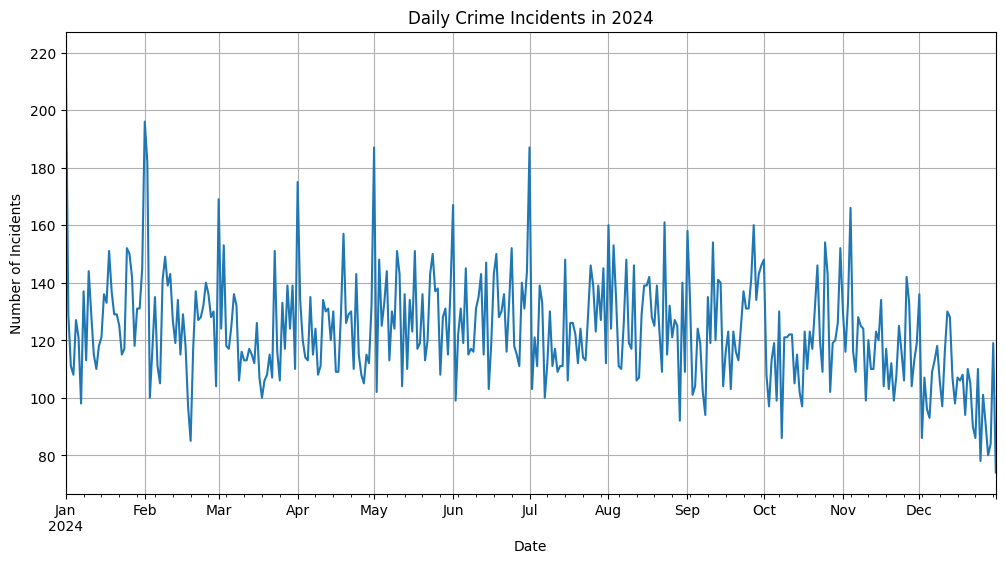


Correlation Matrix (Crime Count vs Weather):
                   crime_count  max_temperature_v  min_temperature_v  \
crime_count           1.000000           0.115255           0.097804   
max_temperature_v     0.115255           1.000000           0.997065   
min_temperature_v     0.097804           0.997065           1.000000   
precipitation_v       0.152762           0.552706           0.547231   

                   precipitation_v  
crime_count               0.152762  
max_temperature_v         0.552706  
min_temperature_v         0.547231  
precipitation_v           1.000000  


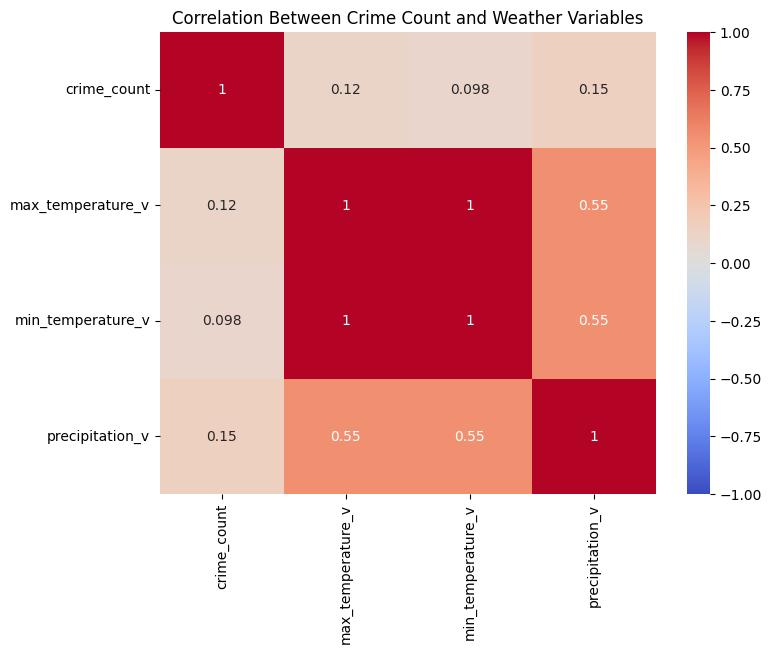

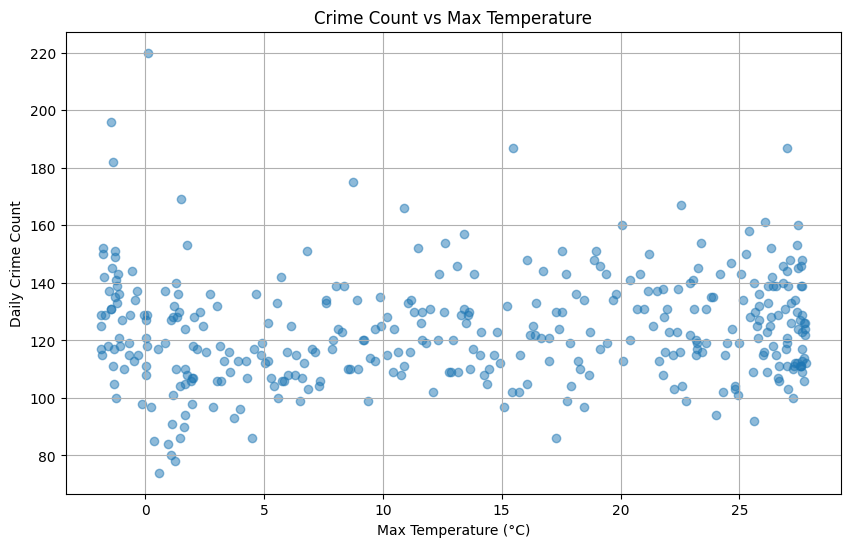


Geospatial Data Check:
LONG_WGS84 sample: 0   -79.348817
1   -79.381487
2   -79.516806
3   -79.373776
4   -79.373776
Name: LONG_WGS84, dtype: float64
LAT_WGS84 sample: 0    43.689412
1    43.654039
2    43.719128
3    43.648437
4    43.648437
Name: LAT_WGS84, dtype: float64
NaN counts - LONG_WGS84: 0 LAT_WGS84: 0
Total rows with valid coordinates: 45218
Interactive crime hotspot map saved as 'toronto_crime_hotspots_2024.html'. Open it in a browser!


In [ ]:
#generates graphs and correlations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')

# Ensure OCC_DATE is in datetime format for analysis
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# 1. Crime Trends by Type and Time
print("Crime Counts by Type (MCI_CATEGORY):")
crime_by_type = merged_df['MCI_CATEGORY'].value_counts()
print(crime_by_type)

# Plot crime trends over time
plt.figure(figsize=(12, 6))
merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().plot()
plt.title('Daily Crime Incidents in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# 2. Weather Correlation Analysis
# Select key weather variables and crime counts
weather_vars = ['max_temperature_v', 'min_temperature_v', 'precipitation_v']
crime_counts = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')

# Merge daily crime counts with weather data
daily_data = pd.merge(crime_counts, merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(), on='OCC_DATE')

# Correlation matrix
correlation_matrix = daily_data[['crime_count'] + weather_vars].corr()
print("\nCorrelation Matrix (Crime Count vs Weather):")
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Crime Count and Weather Variables')
plt.show()

# Scatter plot: Crime vs Temperature
plt.figure(figsize=(10, 6))
plt.scatter(daily_data['max_temperature_v'], daily_data['crime_count'], alpha=0.5)
plt.title('Crime Count vs Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Daily Crime Count')
plt.grid(True)
plt.show()

# 3.Geospatial Hotspot Mapping with Folium
# Check geospatial data
print("\nGeospatial Data Check:")
print("LONG_WGS84 sample:", merged_df['LONG_WGS84'].head())
print("LAT_WGS84 sample:", merged_df['LAT_WGS84'].head())
print("NaN counts - LONG_WGS84:", merged_df['LONG_WGS84'].isna().sum(),
      "LAT_WGS84:", merged_df['LAT_WGS84'].isna().sum())
print("Total rows with valid coordinates:", merged_df[['LONG_WGS84', 'LAT_WGS84']].dropna().shape[0])

# Convert coordinates to numeric and drop NaN
merged_df['LONG_WGS84'] = pd.to_numeric(merged_df['LONG_WGS84'], errors='coerce')
merged_df['LAT_WGS84'] = pd.to_numeric(merged_df['LAT_WGS84'], errors='coerce')
geo_df = merged_df.dropna(subset=['LONG_WGS84', 'LAT_WGS84'])

# Create a base map centered on Toronto (approx. lat: 43.7, lon: -79.4)
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Prepare data for heatmap (latitude, longitude pairs)
heat_data = geo_df[['LAT_WGS84', 'LONG_WGS84']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(toronto_map)

# Save the map to an HTML file (viewable in a browser)
toronto_map.save('toronto_crime_hotspots_2024.html')
print("Interactive crime hotspot map saved as 'toronto_crime_hotspots_2024.html'. Open it in a browser!")

# Optional: Add individual markers (commented out due to potential clutter with many points)
# for idx, row in geo_df.iterrows():
#     folium.Marker([row['LAT_WGS84'], row['LONG_WGS84']],
#                   popup=row['MCI_CATEGORY']).add_to(toronto_map)

Crime Counts by Type (MCI_CATEGORY):
MCI_CATEGORY
Assault            24160
Auto Theft          9276
Break and Enter     6786
Robbery             3172
Theft Over          1824
Name: count, dtype: int64


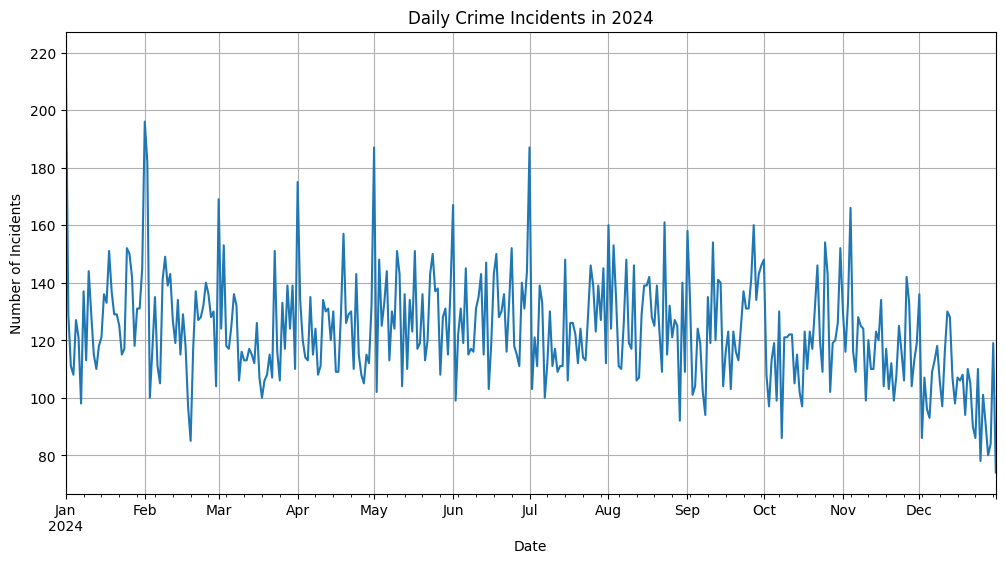


Correlation Matrix (Crime Count vs Weather):
                   crime_count  max_temperature_v  min_temperature_v  \
crime_count           1.000000           0.115255           0.097804   
max_temperature_v     0.115255           1.000000           0.997065   
min_temperature_v     0.097804           0.997065           1.000000   
precipitation_v       0.152762           0.552706           0.547231   

                   precipitation_v  
crime_count               0.152762  
max_temperature_v         0.552706  
min_temperature_v         0.547231  
precipitation_v           1.000000  


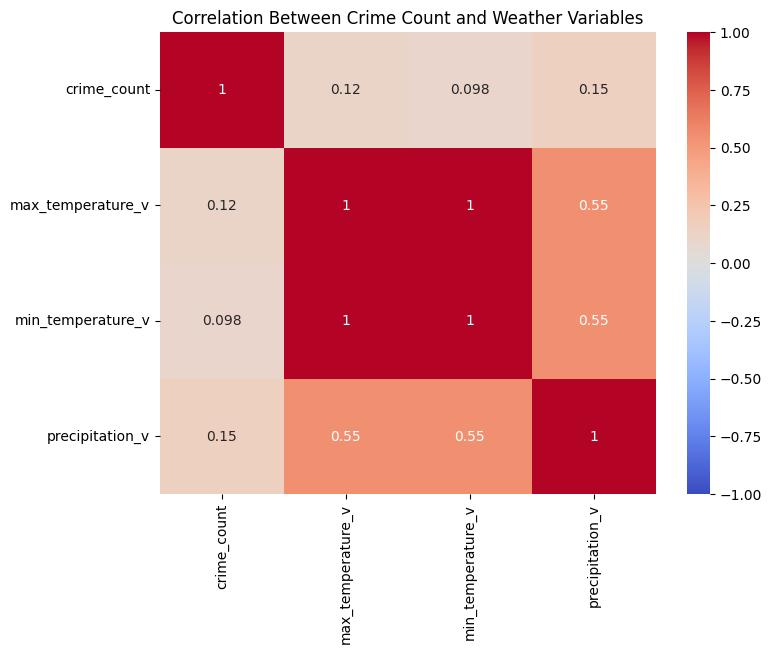

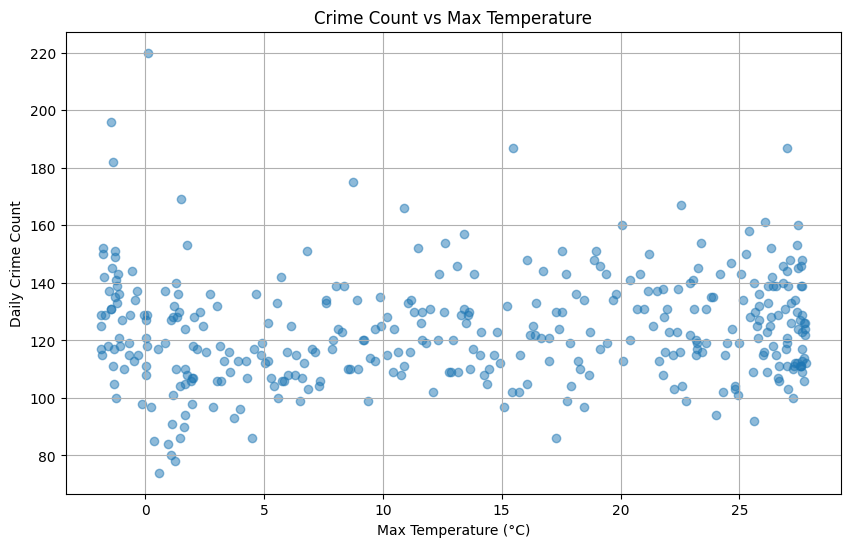


Geospatial Data Check:
LONG_WGS84 sample: 0   -79.348817
1   -79.381487
2   -79.516806
3   -79.373776
4   -79.373776
Name: LONG_WGS84, dtype: float64
LAT_WGS84 sample: 0    43.689412
1    43.654039
2    43.719128
3    43.648437
4    43.648437
Name: LAT_WGS84, dtype: float64
NaN counts - LONG_WGS84: 0 LAT_WGS84: 0
Total rows with valid coordinates: 45218
Sample of heat_data (first 5 entries): [[43.6894121992519, -79.3488165151935], [43.6540393931431, -79.3814871452415], [43.7191284464449, -79.5168060426521], [43.6484368875405, -79.3737761480365], [43.6484368875405, -79.3737761480365]]
Interactive crime hotspot map with custom colors saved as 'toronto_crime_hotspots_2024_custom.html'. Open it in a browser!


In [ ]:
#generates heat map on actual map using folium

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')

# Ensure OCC_DATE is in datetime format
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Previous EDA sections (unchanged)
print("Crime Counts by Type (MCI_CATEGORY):")
crime_by_type = merged_df['MCI_CATEGORY'].value_counts()
print(crime_by_type)

plt.figure(figsize=(12, 6))
merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().plot()
plt.title('Daily Crime Incidents in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

weather_vars = ['max_temperature_v', 'min_temperature_v', 'precipitation_v']
crime_counts = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
daily_data = pd.merge(crime_counts, merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(), on='OCC_DATE')

correlation_matrix = daily_data[['crime_count'] + weather_vars].corr()
print("\nCorrelation Matrix (Crime Count vs Weather):")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Crime Count and Weather Variables')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(daily_data['max_temperature_v'], daily_data['crime_count'], alpha=0.5)
plt.title('Crime Count vs Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Daily Crime Count')
plt.grid(True)
plt.show()

# Geospatial Hotspot Mapping with Custom Colors
print("\nGeospatial Data Check:")
print("LONG_WGS84 sample:", merged_df['LONG_WGS84'].head())
print("LAT_WGS84 sample:", merged_df['LAT_WGS84'].head())
print("NaN counts - LONG_WGS84:", merged_df['LONG_WGS84'].isna().sum(),
      "LAT_WGS84:", merged_df['LAT_WGS84'].isna().sum())
print("Total rows with valid coordinates:", merged_df[['LONG_WGS84', 'LAT_WGS84']].dropna().shape[0])

# Convert coordinates to numeric and drop NaN
merged_df['LONG_WGS84'] = pd.to_numeric(merged_df['LONG_WGS84'], errors='coerce')
merged_df['LAT_WGS84'] = pd.to_numeric(merged_df['LAT_WGS84'], errors='coerce')
geo_df = merged_df.dropna(subset=['LONG_WGS84', 'LAT_WGS84'])

# Verify heat_data format
heat_data = geo_df[['LAT_WGS84', 'LONG_WGS84']].values.tolist()
print("Sample of heat_data (first 5 entries):", heat_data[:5])

# Create a base map centered on Toronto
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Define a custom color gradient (keys should be strings)
custom_gradient = {
    '0.0': '#0000FF',  # Blue (low density)
    '0.3': '#00FF00',  # Green
    '0.6': '#FFFF00',  # Yellow
    '1.0': '#FF0000'   # Red (high density)
}

# Add heatmap layer with explicit parameters
HeatMap(
    data=heat_data,
    radius=10,
    blur=15,
    max_zoom=13,
    gradient=custom_gradient
).add_to(toronto_map)

# Save the map to an HTML file
toronto_map.save('/content/drive/MyDrive/110171056/toronto_crime_hotspots_2024_custom.html')
print("Interactive crime hotspot map with custom colors saved as 'toronto_crime_hotspots_2024_custom.html'. Open it in a browser!")

In [ ]:
#sarima model implementation

Weather Data Ranges:
       max_temperature_v  precipitation_v
count         366.000000       366.000000
mean           13.517923         2.173142
std            10.282512         0.334361
min            -1.870000         1.270000
25%             3.150000         1.920000
50%            13.535000         2.190000
75%            23.610000         2.440000
max            27.790000         2.990000

SARIMA Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1360.424
Date:                           Mon, 24 Mar 2025   AIC                           2732.847
Time:                                   04:05:20   BIC                           2755.438
Sample:                               01-01-2024   HQIC                          2741.869
                                    - 

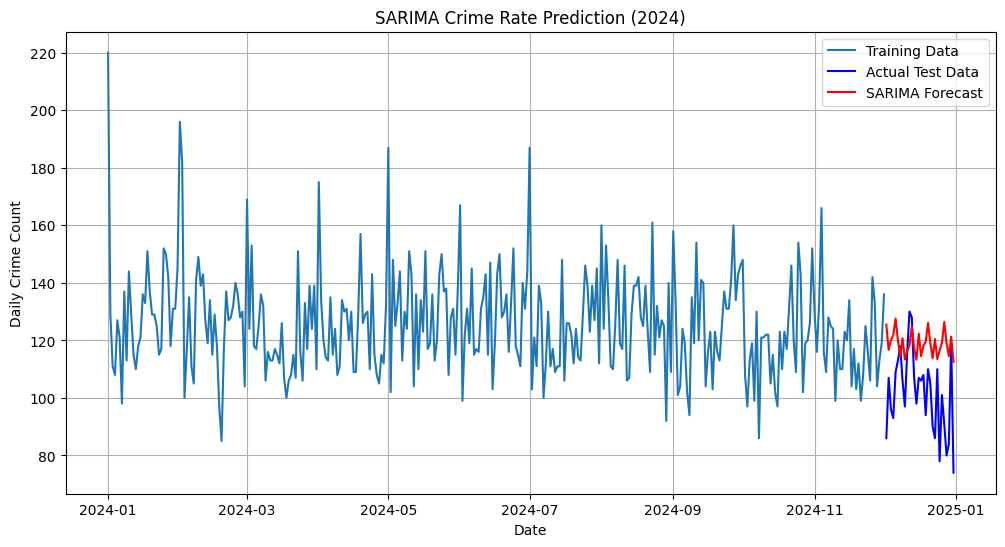

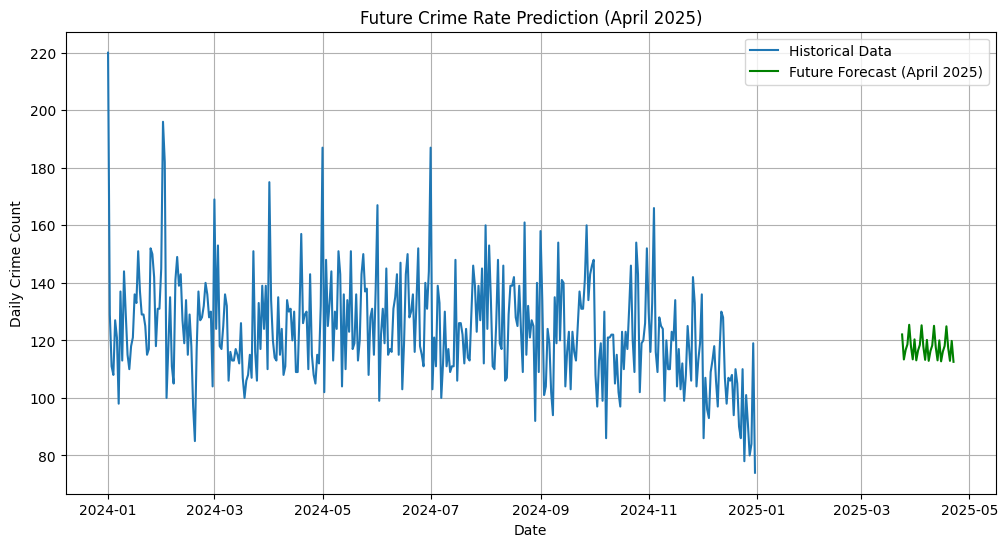

In [ ]:
#sarima model implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts and merge with weather
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')

# Set index with explicit daily frequency
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Check weather data range
print("Weather Data Ranges:")
print(daily_data[weather_vars].describe())

# Handle missing values (if any remain)
daily_data[weather_vars] = daily_data[weather_vars].fillna(daily_data[weather_vars].mean())

# Split into train/test (last 30 days as test)
train_data = daily_data.iloc[:-30]
test_data = daily_data.iloc[-30:]

endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA with simpler seasonal order to aid convergence
model = SARIMAX(endog_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 1, 1, 7),  # Reduced AR term
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_fit = model.fit(disp=False, maxiter=100)  # Increased iterations

# Print summary
print("\nSARIMA Model Summary:")
print(sarima_fit.summary())

# Forecast on test set
forecast = sarima_fit.forecast(steps=30, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Crime Rate Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction (April 2025)
future_dates = pd.date_range(start='2025-03-24', periods=30, freq='D')
future_exog = pd.DataFrame([exog_test.iloc[-1]] * 30, index=future_dates, columns=weather_vars)
future_forecast = sarima_fit.forecast(steps=30, exog=future_exog)

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast (April 2025)', color='green')
plt.title('Future Crime Rate Prediction (April 2025)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3168.372, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3038.296, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.69 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3106.082, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=3103.004, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,0)[7]             : AIC=3007.045, Time=0.30 sec
 ARIMA(2,1,0)(0,1,0)[7]             : AIC=3080.528, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,1,1)[7]             : AIC=inf, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,0)[7]             : AIC=inf, Time=1.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[7]             : AIC=inf, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,0)[7] intercept   : AIC=3008.983, Time=0.77 sec

Best model:  ARIMA(2,1,0)(1,1,0)[7]          
Total fit time: 9.628 seconds

Best SARIMA Model:                                      SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  336
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -1499.522
Date:                           Mon, 24 Mar 2025   AIC                           3007.045
Time:                                   04:16:59   BIC                           3022.217
Sample:                               01-01-2024   HQIC                          3013.098
                                    - 12-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

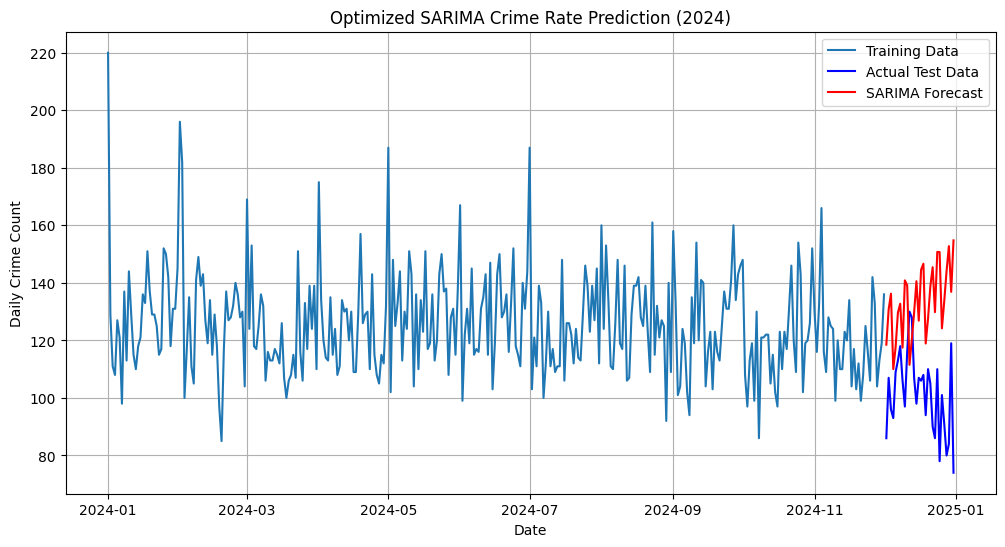

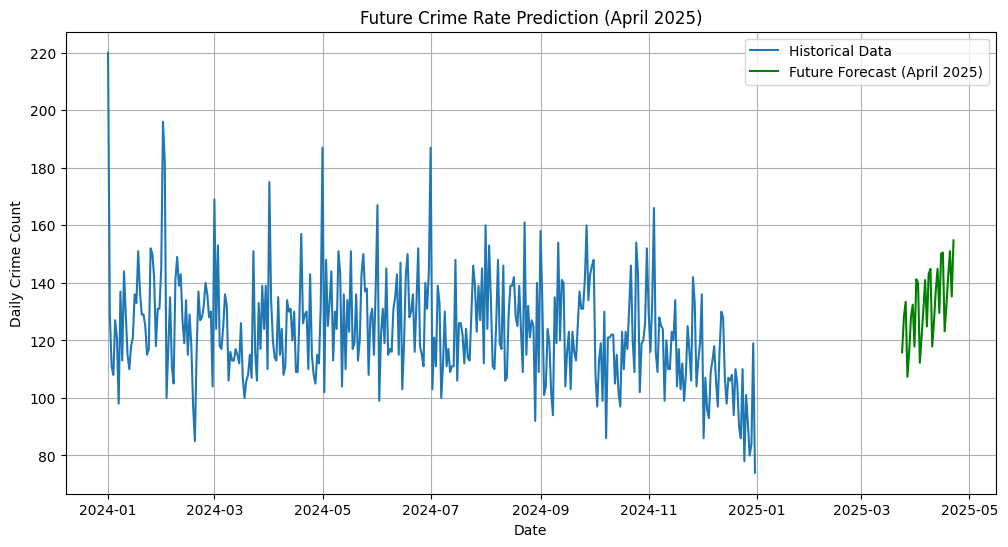

In [ ]:
#Refined Code with Auto-Tuning

#after tuning found a good version

#Let’s try pmdarima.auto_arima to optimize SARIMA parameters automatically, ensuring the best fit. Here’s the updated script:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test
train_data = daily_data.iloc[:-30]
test_data = daily_data.iloc[-30:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Auto-tune SARIMA
auto_model = auto_arima(endog_train,
                        exogenous=exog_train,
                        seasonal=True,
                        m=7,  # Weekly seasonality
                        start_p=0, start_q=0,
                        max_p=2, max_q=2,
                        start_P=0, max_P=1,
                        d=1, D=1,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True)
print("\nBest SARIMA Model:", auto_model.summary())

# Fit the best model
order = auto_model.order
seasonal_order = auto_model.seasonal_order
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=order,
                      seasonal_order=seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

# Forecast test set
forecast = sarima_fit.forecast(steps=30, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('Optimized SARIMA Crime Rate Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
future_dates = pd.date_range(start='2025-03-24', periods=30, freq='D')
future_exog = pd.DataFrame([exog_test.iloc[-1]] * 30, index=future_dates, columns=weather_vars)
future_forecast = sarima_fit.forecast(steps=30, exog=future_exog)

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast (April 2025)', color='green')
plt.title('Future Crime Rate Prediction (April 2025)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


SARIMA Model (1,1,1)(0,1,1,7) with Weather:
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1360.424
Date:                           Mon, 24 Mar 2025   AIC                           2732.847
Time:                                   04:24:36   BIC                           2755.438
Sample:                               01-01-2024   HQIC                          2741.869
                                    - 12-01-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v     0.0171      0.151      0.113      0.910  

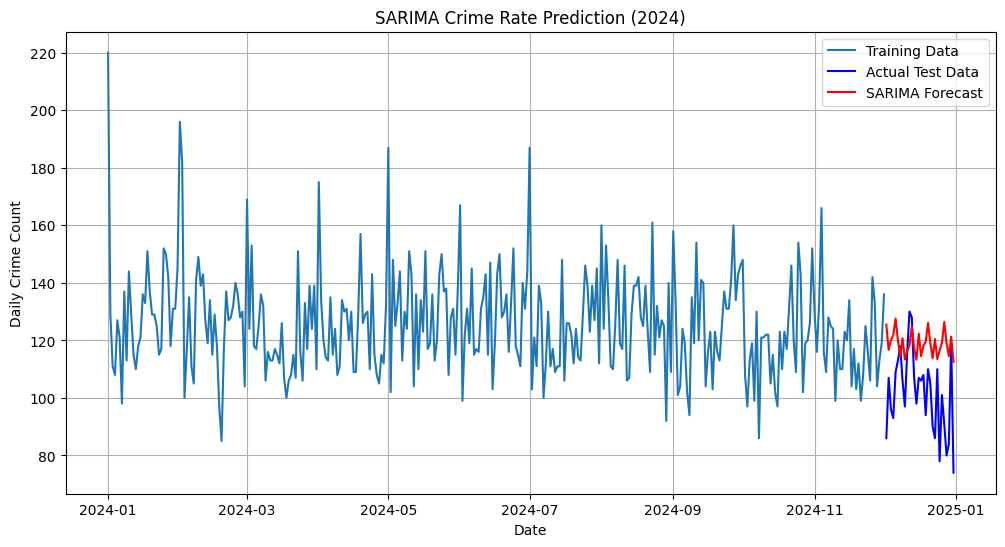

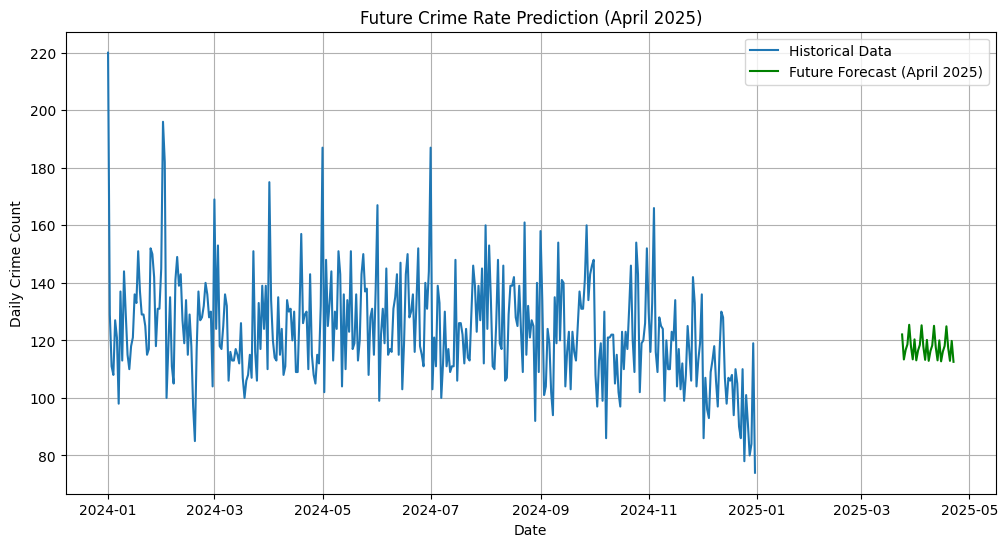

In [ ]:
# Title: Refined SARIMA Model with Weather Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test
train_data = daily_data.iloc[:-30]
test_data = daily_data.iloc[-30:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA with previous order
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),
                      seasonal_order=(0, 1, 1, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=100)

# Print summary
print("\nSARIMA Model (1,1,1)(0,1,1,7) with Weather:")
print(sarima_fit.summary())

# Forecast test set
forecast = sarima_fit.forecast(steps=30, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Crime Rate Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
future_dates = pd.date_range(start='2025-03-24', periods=30, freq='D')
future_exog = pd.DataFrame([exog_test.iloc[-1]] * 30, index=future_dates, columns=weather_vars)
future_forecast = sarima_fit.forecast(steps=30, exog=future_exog)

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast (April 2025)', color='green')
plt.title('Future Crime Rate Prediction (April 2025)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0484 - val_loss: 0.0099
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - val_loss: 0.0097
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0172 - val_loss: 0.0089
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0126 - val_loss: 0.0093
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - val_loss: 0.0092
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0143 - val_loss: 0.0091
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - val_loss: 0.0095
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - val_loss: 0.0094
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154 - val_loss: 0.0095
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0127 - val_loss: 0.0092
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - val_loss: 0.0091
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0120 - val_l

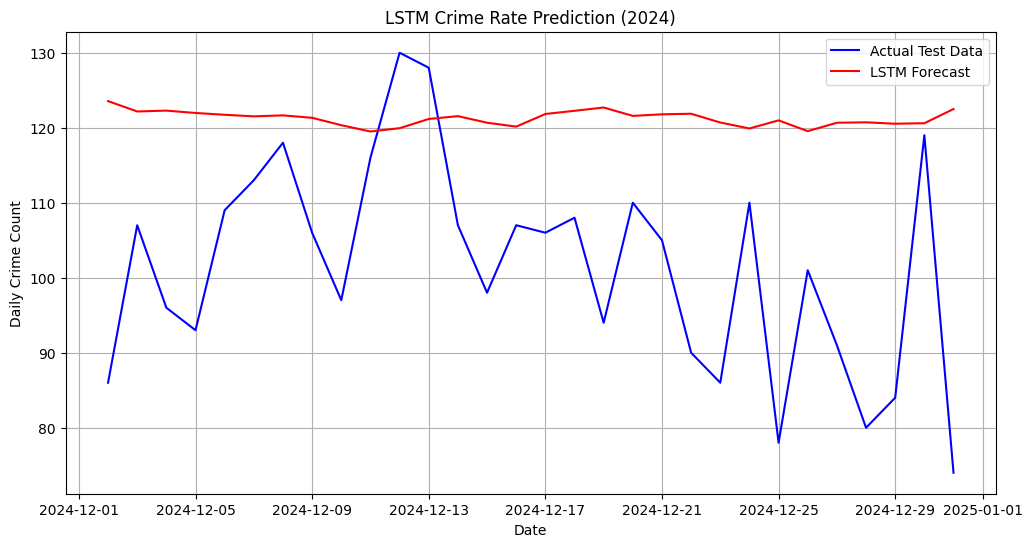

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

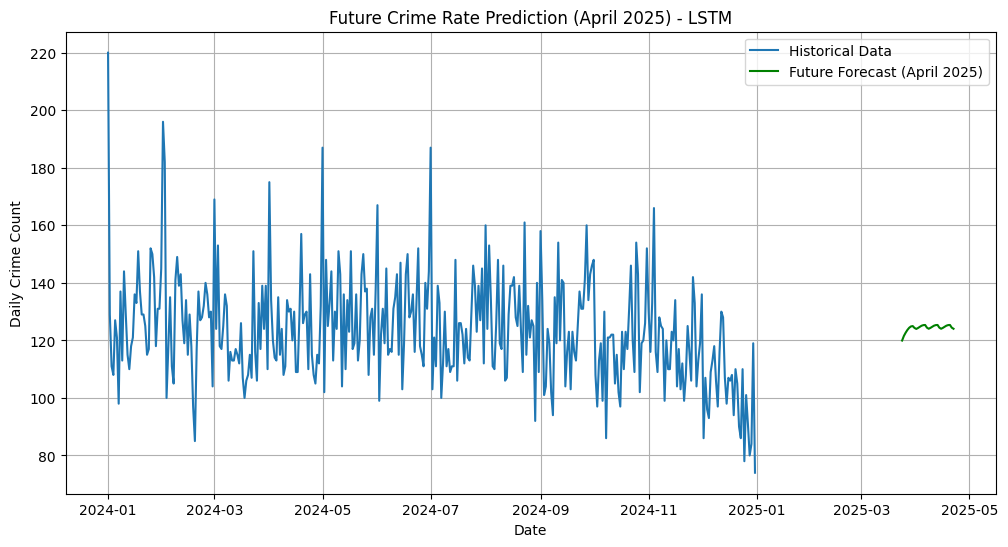

In [ ]:
# Title: LSTM Model for Crime Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences (e.g., 7-day lookback)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predict crime_count
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

# Split train/test
train_size = len(X) - 30
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Forecast test set
y_pred = model.predict(X_test)

# Inverse scale predictions
y_test_full = np.zeros((len(y_test), scaled_data.shape[1]))
y_test_full[:, 0] = y_test
y_pred_full = np.zeros((len(y_pred), scaled_data.shape[1]))
y_pred_full[:, 0] = y_pred.flatten()
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

# Evaluate
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-30:], y_test_inv, label='Actual Test Data', color='blue')
plt.plot(daily_data.index[-30:], y_pred_inv, label='LSTM Forecast', color='red')
plt.title('LSTM Crime Rate Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction (rough, using last sequence)
last_sequence = scaled_data[-seq_length:]
future_pred = []
for _ in range(30):
    pred = model.predict(last_sequence.reshape(1, seq_length, len(weather_vars) + 1))
    future_pred.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = pred[0, 0]  # Update crime_count, keep weather static

future_pred_full = np.zeros((30, scaled_data.shape[1]))
future_pred_full[:, 0] = future_pred
future_pred_inv = scaler.inverse_transform(future_pred_full)[:, 0]

future_dates = pd.date_range(start='2025-03-24', periods=30, freq='D')
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data')
plt.plot(future_dates, future_pred_inv, label='Future Forecast (April 2025)', color='green')
plt.title('Future Crime Rate Prediction (April 2025) - LSTM')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


Optimized SARIMA Model with Enhanced Weather Data (2024 Subset):
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1360.043
Date:                           Mon, 24 Mar 2025   AIC                           2734.086
Time:                                   04:31:35   BIC                           2760.442
Sample:                               01-01-2024   HQIC                          2744.611
                                    - 12-01-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v     0.0045      0.154   

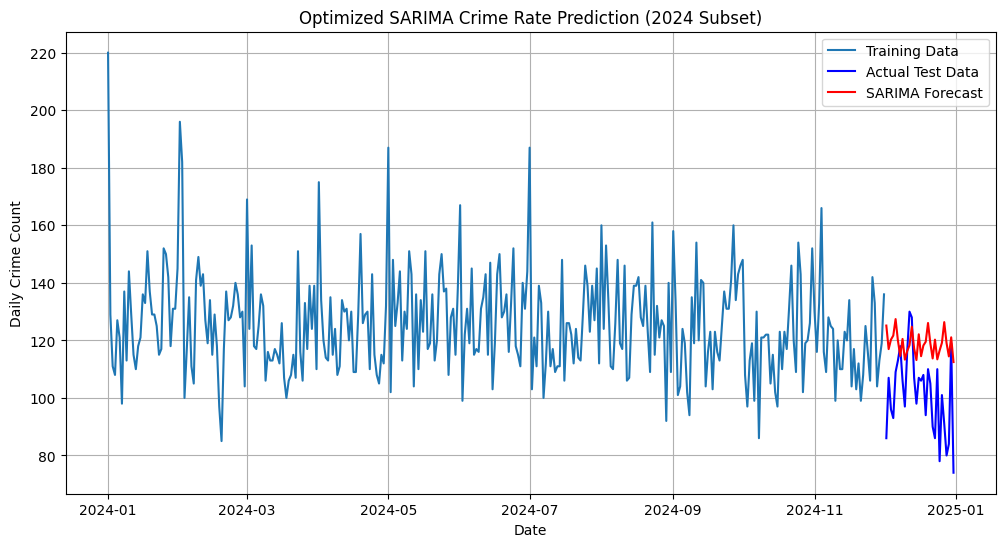

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

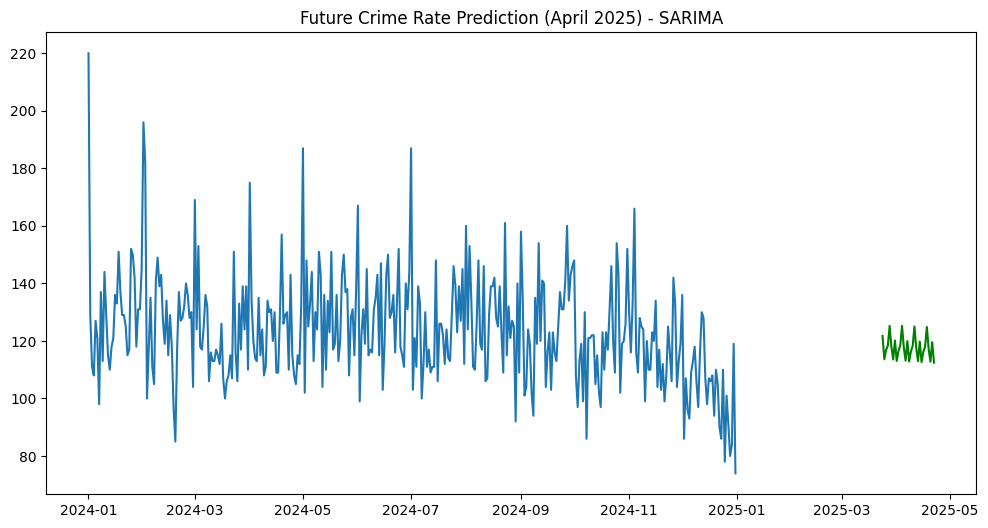

In [ ]:
# Title: Optimized SARIMA Model with Enhanced Weather Data for big data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load dataset (your 2024 subset for testing)
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_crime_weather_2024.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']  # Add 'min_temperature_v' or others if in full data
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test (last 30 days as test)
train_data = daily_data.iloc[:-30]
test_data = daily_data.iloc[-30:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA with adjusted parameters
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 7),  # Reintroduce seasonal AR for better fit
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Print summary
print("\nOptimized SARIMA Model with Enhanced Weather Data (2024 Subset):")
print(sarima_fit.summary())

# Forecast test set
forecast = sarima_fit.forecast(steps=30, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('Optimized SARIMA Crime Rate Prediction (2024 Subset)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
future_dates = pd.date_range(start='2025-03-24', periods=30, freq='D')
future_exog = pd.DataFrame([exog_test.iloc[-1]] * 30, index=future_dates, columns=weather_vars)
future_forecast = sarima_fit.forecast(steps=30, exog=future_exog)

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2024)')
plt.plot(future_dates, future_forecast, label='Future Forecast (April 2025)', color='green')
plt.title('Future Crime Rate Prediction (April 2025) - SARIMA')
plt.xlabel

In [ ]:
# Title: Extract Crime Data from June 28, 2022 to March 23, 2025 (Date Only, Ignoring Time)
import pandas as pd

# Load the full crime dataset
crime_df = pd.read_csv('/content/drive/MyDrive/110171056/Major_Crime_Indicators_Open_Data_-3805566126367379926.csv')

# Convert OCC_DATE from MM/DD/YYYY HH:MM:SS AM/PM to datetime, then extract date only
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

# Define the date range: June 28, 2022 to March 23, 2025
start_date = pd.to_datetime('2022-06-28').date()
end_date = pd.to_datetime('2025-03-23').date()

# Filter for records between June 28, 2022 and March 23, 2025
crime_filtered_df = crime_df[(crime_df['OCC_DATE'] >= start_date) & (crime_df['OCC_DATE'] <= end_date)]

# Save the filtered dataset
crime_filtered_df.to_csv('/content/drive/MyDrive/110171056/crime.csv', index=False)

# Display basic info and first few rows
print("Crime Data from June 28, 2022 to March 23, 2025 (Date Only):")
print(f"Total rows: {len(crime_filtered_df)}")
print(crime_filtered_df.head())

Crime Data from June 28, 2022 to March 23, 2025 (Date Only):
Total rows: 116499
        OBJECTID EVENT_UNIQUE_ID           REPORT_DATE    OCC_DATE  \
301112    301113  GO-20221227278  6/28/2022 5:00:00 AM  2022-06-28   
301115    301116  GO-20221228286  6/28/2022 5:00:00 AM  2022-06-28   
301116    301117  GO-20221227773  6/28/2022 5:00:00 AM  2022-06-28   
301120    301121  GO-20221228869  6/28/2022 5:00:00 AM  2022-06-28   
301121    301122  GO-20221228869  6/28/2022 5:00:00 AM  2022-06-28   

        REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  \
301112         2022         June          28         179  Tuesday      
301115         2022         June          28         179  Tuesday      
301116         2022         June          28         179  Tuesday      
301120         2022         June          28         179  Tuesday      
301121         2022         June          28         179  Tuesday      

        REPORT_HOUR  ...                         OFFENCE     MCI_C

In [ ]:
#merging both the datasets

import pandas as pd

# Step 1: Load the datasets
crime_df = pd.read_csv('/content/drive/MyDrive/110171056/crime.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/110171056/weatherstats_toronto_normal_daily.csv')

# Step 2: Preprocess the crime dataset
# Check the raw OCC_DATE values before conversion
print("Sample of raw OCC_DATE values:")
print(crime_df['OCC_DATE'].head())

# Attempt to convert OCC_DATE to datetime, with error handling
crime_df['OCC_DATE'] = pd.to_datetime(crime_df['OCC_DATE'], errors='coerce')

# Check how many dates failed to convert
print("\nNumber of NaN values in OCC_DATE after conversion:", crime_df['OCC_DATE'].isna().sum())
print("Sample of OCC_DATE after initial conversion:")
print(crime_df['OCC_DATE'].head())

# Format to YYYY-MM-DD
crime_df['OCC_DATE'] = crime_df['OCC_DATE'].dt.strftime('%Y-%m-%d')

# Verify the result
print("\nSample of OCC_DATE after formatting to YYYY-MM-DD:")
print(crime_df['OCC_DATE'].head())

# Step 3: Preprocess the weather dataset
# Convert 'date' to YYYY-MM-DD format
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d', errors='coerce')
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')

# Step 4: Merge the datasets on date
merged_df = pd.merge(
    crime_df,
    weather_df,
    how='left',
    left_on='OCC_DATE',
    right_on='date'
)

# Step 5: Select all relevant columns
crime_columns = [
    'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH',
    'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE',
    'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158',
    'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'
]

weather_columns = [
    'date', 'max_dew_point_v', 'min_dew_point_v', 'max_relative_humidity_v',
    'min_relative_humidity_v', 'max_temperature_v', 'min_temperature_v',
    'max_wind_speed_v', 'min_wind_speed_v', 'precipitation_v', 'solar_radiation_v',
    'max_dew_point_s', 'max_dew_point_c', 'max_dew_point_d',
    'min_dew_point_s', 'min_dew_point_c', 'min_dew_point_d',
    'max_relative_humidity_s', 'max_relative_humidity_c', 'max_relative_humidity_d',
    'min_relative_humidity_s', 'min_relative_humidity_c', 'min_relative_humidity_d',
    'max_temperature_s', 'max_temperature_c', 'max_temperature_d',
    'min_temperature_s', 'min_temperature_c', 'min_temperature_d',
    'max_wind_speed_s', 'max_wind_speed_c', 'max_wind_speed_d',
    'min_wind_speed_s', 'min_wind_speed_c', 'min_wind_speed_d',
    'precipitation_s', 'precipitation_c', 'precipitation_d',
    'solar_radiation_s', 'solar_radiation_c', 'solar_radiation_d'
]

columns_to_keep = crime_columns + [col for col in weather_columns if col != 'date']
columns_to_keep = [col for col in columns_to_keep if col in merged_df.columns]
merged_df = merged_df[columns_to_keep]

# Step 6: Handle missing values in weather columns
weather_numeric_cols = [col for col in weather_columns if col != 'date' and '_d' not in col and col in merged_df.columns]
merged_df[weather_numeric_cols] = merged_df[weather_numeric_cols].fillna(-999)

# Step 7: Save the merged dataset
merged_df.to_csv('/content/drive/MyDrive/110171056/merged.csv', index=False)

# Step 8: Verify the merged dataset
print("\nMerged Dataset Sample (First 5 Rows):")
print(merged_df.head())

print("\nMerged Dataset Info:")
print(merged_df.info())

Sample of raw OCC_DATE values:
0    2022-06-28
1    2022-06-28
2    2022-06-28
3    2022-06-28
4    2022-06-28
Name: OCC_DATE, dtype: object

Number of NaN values in OCC_DATE after conversion: 0
Sample of OCC_DATE after initial conversion:
0   2022-06-28
1   2022-06-28
2   2022-06-28
3   2022-06-28
4   2022-06-28
Name: OCC_DATE, dtype: datetime64[ns]

Sample of OCC_DATE after formatting to YYYY-MM-DD:
0    2022-06-28
1    2022-06-28
2    2022-06-28
3    2022-06-28
4    2022-06-28
Name: OCC_DATE, dtype: object

Merged Dataset Sample (First 5 Rows):
   OBJECTID EVENT_UNIQUE_ID           REPORT_DATE    OCC_DATE  OCC_YEAR  \
0    301113  GO-20221227278  6/28/2022 5:00:00 AM  2022-06-28    2022.0   
1    301116  GO-20221228286  6/28/2022 5:00:00 AM  2022-06-28    2022.0   
2    301117  GO-20221227773  6/28/2022 5:00:00 AM  2022-06-28    2022.0   
3    301121  GO-20221228869  6/28/2022 5:00:00 AM  2022-06-28    2022.0   
4    301122  GO-20221228869  6/28/2022 5:00:00 AM  2022-06-28    2022.0


SARIMA Model on Full Dataset:
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  828
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -3867.589
Date:                           Mon, 24 Mar 2025   AIC                           7745.179
Time:                                   05:04:34   BIC                           7768.676
Sample:                               06-28-2022   HQIC                          7754.199
                                    - 10-02-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v    -6.0274      7.245     -0.832      0.405     -20.228    

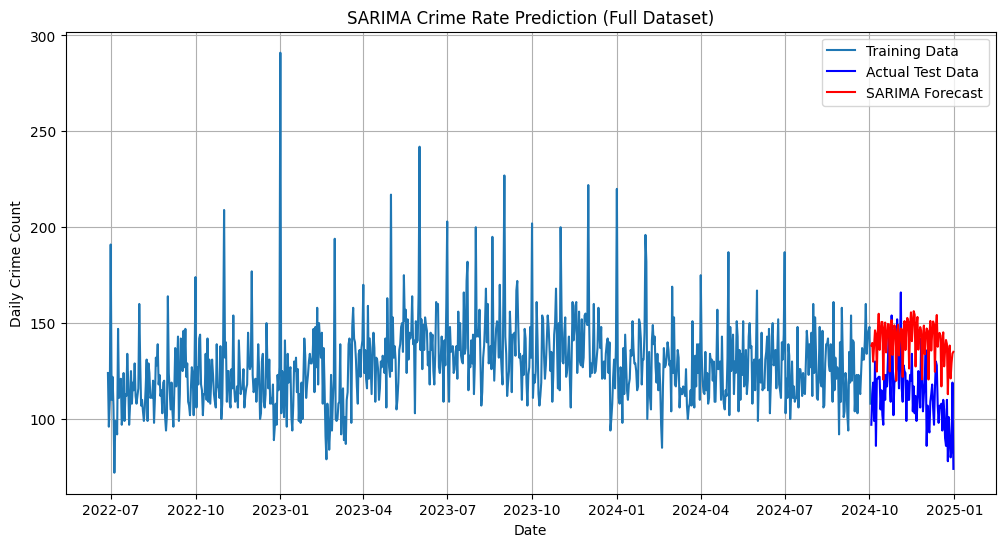

In [ ]:
# Title: SARIMA Model on Full Dataset
#perfect now lets test with big data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load full dataset (update path)
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged.csv')  # Adjust path
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']  # Add more if available
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test (e.g., last 90 days)
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 0),
                      seasonal_order=(1, 1, 0, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Print summary
print("\nSARIMA Model on Full Dataset:")
print(sarima_fit.summary())

# Forecast test set
forecast = sarima_fit.forecast(steps=90, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Crime Rate Prediction (Full Dataset)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


Enhanced SARIMA Model on Full Dataset (2022–2024):
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  828
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3586.040
Date:                           Mon, 24 Mar 2025   AIC                           7186.080
Time:                                   05:06:50   BIC                           7218.968
Sample:                               06-28-2022   HQIC                          7198.706
                                    - 10-02-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v     0.1911      0.176      1.088      

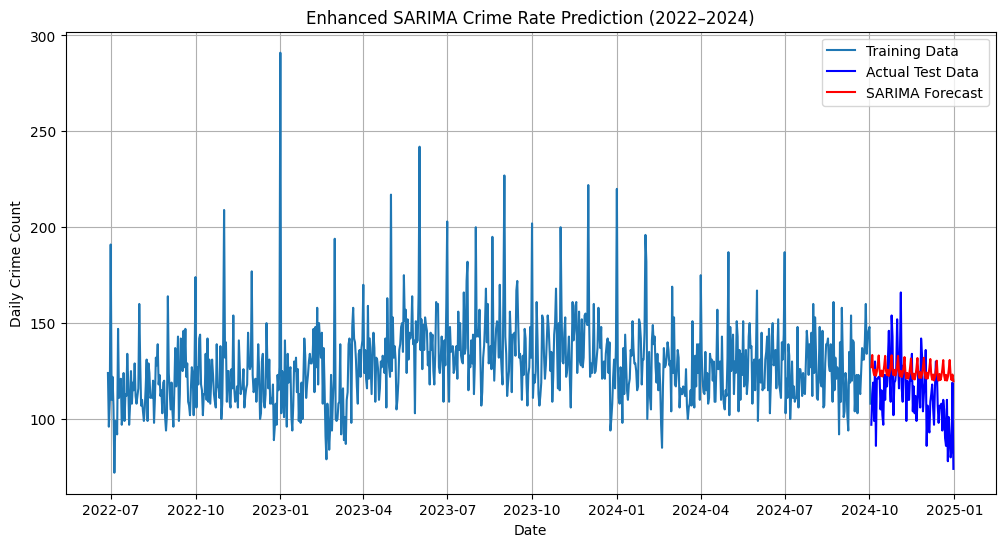

In [ ]:
# Title: Enhanced SARIMA Model on Full Dataset (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test (last 90 days)
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit enhanced SARIMA
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),  # Add MA term
                      seasonal_order=(1, 1, 1, 7),  # Add seasonal MA
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Print summary
print("\nEnhanced SARIMA Model on Full Dataset (2022–2024):")
print(sarima_fit.summary())

# Forecast test set
forecast = sarima_fit.forecast(steps=90, exog=exog_test)
forecast_index = test_data.index

# Evaluate
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='red')
plt.title('Enhanced SARIMA Crime Rate Prediction (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


Refined SARIMA Model on Full Dataset (2022–2024):
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  828
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3586.072
Date:                           Mon, 24 Mar 2025   AIC                           7184.144
Time:                                   05:09:05   BIC                           7212.333
Sample:                               06-28-2022   HQIC                          7194.966
                                    - 10-02-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v     0.1904      0.175      1.086      0

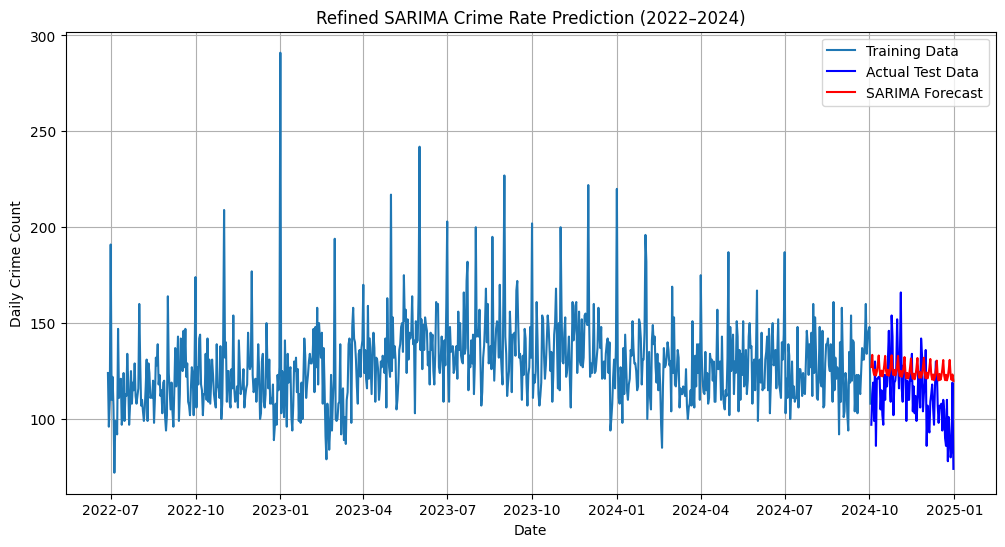

In [ ]:
# Title: Refined SARIMA Model on Full Dataset (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']  # Add 'min_temperature_v' if available
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit refined SARIMA
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),
                      seasonal_order=(0, 1, 1, 7),  # Drop seasonal AR
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Print summary
print("\nRefined SARIMA Model on Full Dataset (2022–2024):")
print(sarima_fit.summary())

# Forecast and evaluate
forecast = sarima_fit.forecast(steps=90, exog=exog_test)
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', color='red')
plt.title('Refined SARIMA Crime Rate Prediction (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Title: Extract 2023 and 2024 Data from Merged Dataset
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged.csv')

# Convert OCC_DATE to datetime
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d', errors='coerce')

# Filter for 2023 and 2024
merged_last_2_df = merged_df[merged_df['OCC_DATE'].dt.year.isin([2023, 2024])]

# Save the filtered dataset
merged_last_2_df.to_csv('/content/drive/MyDrive/110171056/merged_last_2.csv', index=False)

# Display basic info and first few rows
print("Merged Data for 2023 and 2024:")
print(f"Total rows: {len(merged_last_2_df)}")
print(merged_last_2_df.head())

Merged Data for 2023 and 2024:
Total rows: 94210
       OBJECTID EVENT_UNIQUE_ID          REPORT_DATE   OCC_DATE  OCC_YEAR  \
21477    323599     GO-20231708  1/1/2023 5:00:00 AM 2023-01-01    2023.0   
21478    323600     GO-20235114  1/1/2023 5:00:00 AM 2023-01-01    2023.0   
21480    323602      GO-2023916  1/1/2023 5:00:00 AM 2023-01-01    2023.0   
21481    323603     GO-20231834  1/1/2023 5:00:00 AM 2023-01-01    2023.0   
21482    323604     GO-20235924  1/1/2023 5:00:00 AM 2023-01-01    2023.0   

      OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR  ...  \
21477   January      1.0      1.0  Sunday             3  ...   
21478   January      1.0      1.0  Sunday            17  ...   
21480   January      1.0      1.0  Sunday             2  ...   
21481   January      1.0      1.0  Sunday             4  ...   
21482   January      1.0      1.0  Sunday            19  ...   

            max_wind_speed_d min_wind_speed_s min_wind_speed_c  \
21477  1992-12-25 2022-01-08         

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0551 - val_loss: 0.0073
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0119 - val_loss: 0.0101
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0105 - val_loss: 0.0074
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0108 - val_loss: 0.0066
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0105 - val_loss: 0.0081
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0118 - val_loss: 0.0078
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0098 - val_loss: 0.0070
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0087 - val_loss: 0.0074
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0087 - val_loss: 0.0065
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

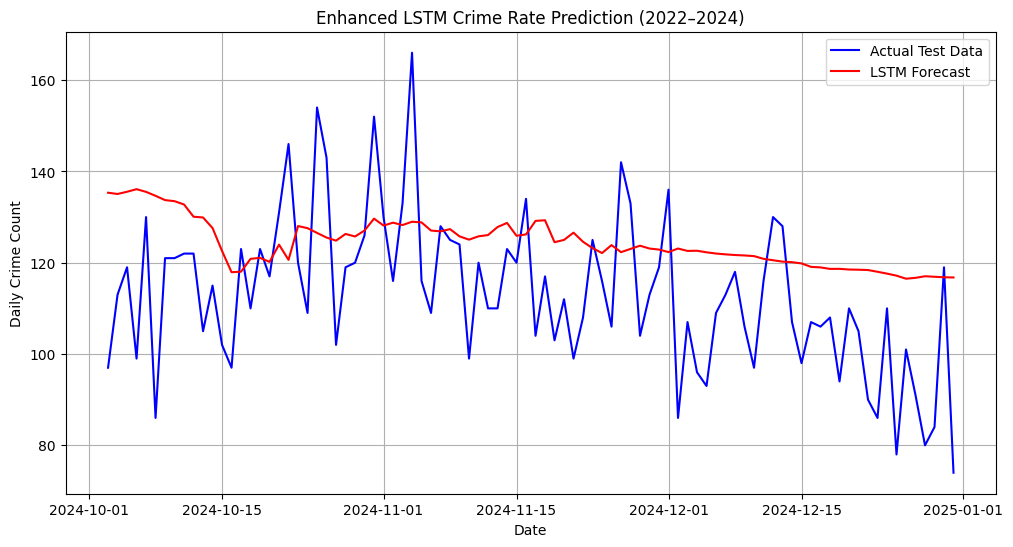

In [ ]:
# Title: Enhanced LSTM Model on Dataset (2023–2024)

#DONOT RUN WILL HANG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 14
X, y = create_sequences(scaled_data, seq_length)
train_size = len(X) - 90
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Forecast
y_pred = model.predict(X_test)

# Inverse scale
y_test_full = np.zeros((len(y_test), scaled_data.shape[1]))
y_test_full[:, 0] = y_test
y_pred_full = np.zeros((len(y_pred), scaled_data.shape[1]))
y_pred_full[:, 0] = y_pred.flatten()
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

# Evaluate
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-90:], y_test_inv, label='Actual Test Data', color='blue')
plt.plot(daily_data.index[-90:], y_pred_inv, label='LSTM Forecast', color='red')
plt.title('Enhanced LSTM Crime Rate Prediction (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



SARIMA with Additional Weather Variables (2022–2024):
                                     SARIMAX Results                                     
Dep. Variable:                       crime_count   No. Observations:                  828
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3583.620
Date:                           Mon, 24 Mar 2025   AIC                           7183.239
Time:                                   05:21:33   BIC                           7220.826
Sample:                               06-28-2022   HQIC                          7197.669
                                    - 10-02-2024                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temperature_v    -0.9321      1.726     -0.540   

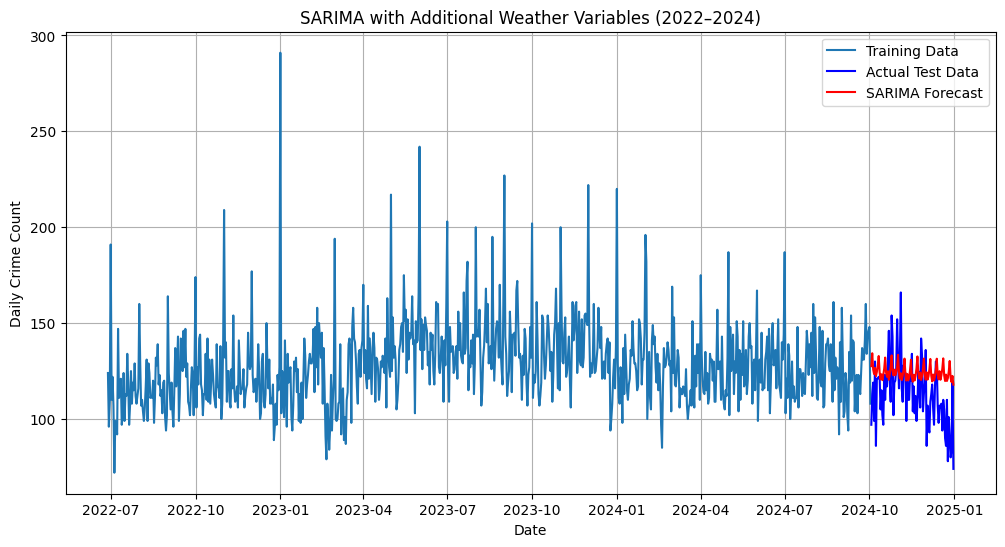

In [ ]:
# Title: SARIMA with Additional Weather Variables (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v', 'min_temperature_v', 'max_wind_speed_v']  # Add more
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),
                      seasonal_order=(0, 1, 1, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Print summary
print("\nSARIMA with Additional Weather Variables (2022–2024):")
print(sarima_fit.summary())

# Forecast and evaluate
forecast = sarima_fit.forecast(steps=90, exog=exog_test)
mse = mean_squared_error(endog_test, forecast)
rmse = np.sqrt(mse)
print(f"\nMean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA with Additional Weather Variables (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0502 - val_loss: 0.0064
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0150 - val_loss: 0.0074
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0103 - val_loss: 0.0083
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0095 - val_loss: 0.0073
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0096 - val_loss: 0.0074
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0097 - val_loss: 0.0065
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0102 - val_loss: 0.0074
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0098 - val_loss: 0.0069
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

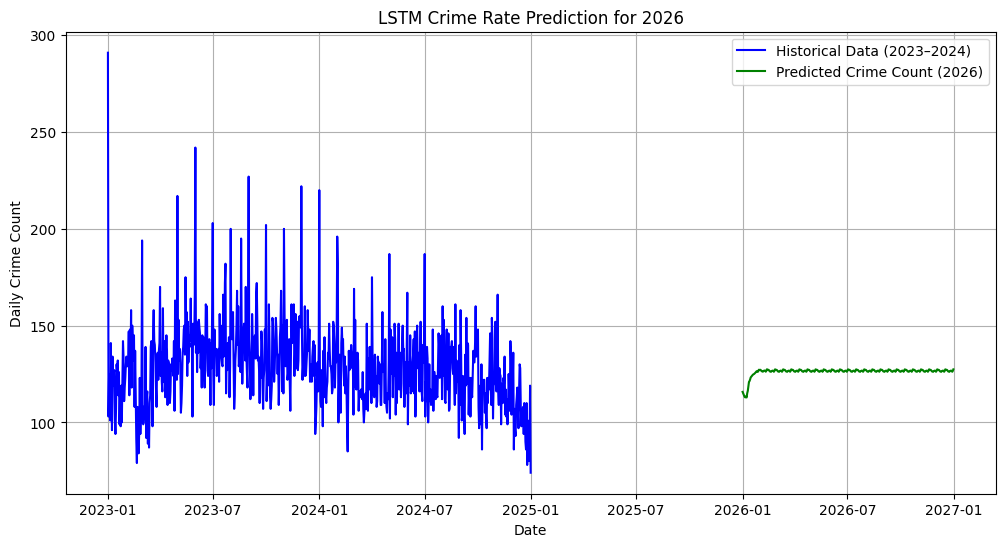


First 5 Predicted Crime Counts for 2026:
        Date  Predicted_Crime_Count
0 2026-01-01             115.754268
1 2026-01-02             115.000818
2 2026-01-03             114.358286
3 2026-01-04             113.539929
4 2026-01-05             113.014538


In [ ]:
# Title: LSTM Future Prediction for 2026 (Based on 2023–2024 Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 14
X, y = create_sequences(scaled_data, seq_length)
train_size = len(X) - 90
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train LSTM (same as before)
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Forecast for 2026 (365 days)
future_steps = 365
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31', freq='D')

# Use the last sequence from the data
last_sequence = scaled_data[-seq_length:].copy()
future_predictions = []

# Predict iteratively, assuming static weather (last known values)
for _ in range(future_steps):
    # Reshape for prediction
    current_sequence = last_sequence.reshape((1, seq_length, len(weather_vars) + 1))
    next_pred = model.predict(current_sequence, verbose=0)

    # Append prediction
    future_predictions.append(next_pred[0, 0])

    # Update sequence: shift left, add new prediction, keep weather static
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = next_pred[0, 0]  # Update crime_count
    # Weather variables (columns 1 and 2) remain the same

# Inverse scale predictions
future_pred_full = np.zeros((len(future_predictions), scaled_data.shape[1]))
future_pred_full[:, 0] = future_predictions
future_pred_inv = scaler.inverse_transform(future_pred_full)[:, 0]

# Create DataFrame for 2026 predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_pred_inv
})

# Save predictions
future_df.to_csv('/content/drive/MyDrive/110171056/crime_predictions_2026.csv', index=False)

# Plot historical data and 2026 forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2023–2024)', color='blue')
plt.plot(future_dates, future_pred_inv, label='Predicted Crime Count (2026)', color='green')
plt.title('LSTM Crime Rate Prediction for 2026')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Display first few predictions
print("\nFirst 5 Predicted Crime Counts for 2026:")
print(future_df.head())

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0379 - val_loss: 0.0062
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0117 - val_loss: 0.0073
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0103 - val_loss: 0.0067
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0103 - val_loss: 0.0071
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0111 - val_loss: 0.0066
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0101 - val_loss: 0.0068
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0102 - val_loss: 0.0065
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0099 - val_loss: 0.0062
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0100 - val_loss: 0.0061
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0099 - val_loss: 0.0062
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


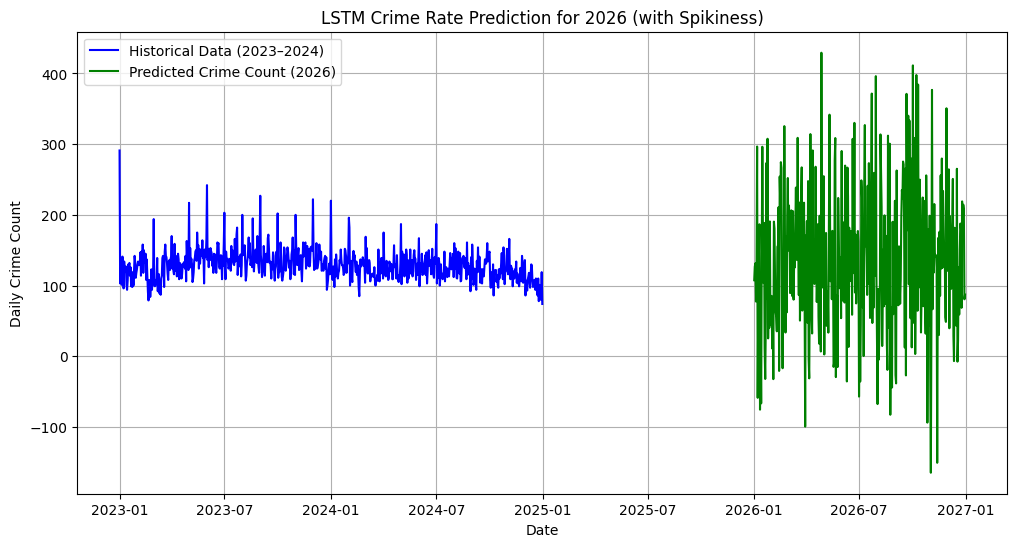


First 5 Predicted Crime Counts for 2026:
        Date  Predicted_Crime_Count
0 2026-01-01             107.557324
1 2026-01-02             126.764862
2 2026-01-03             131.485634
3 2026-01-04              77.463047
4 2026-01-05             126.997044


In [ ]:
# Title: LSTM Future Prediction for 2026 with Spikiness (2023–2024 Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30  # Increased to capture longer patterns
X, y = create_sequences(scaled_data, seq_length)
train_size = len(X) - 90
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build enhanced LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dropout(0.2))
model.add(LSTM(75, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Simulate 2026 weather based on historical monthly averages
monthly_weather = daily_data.groupby(daily_data.index.month)[weather_vars].mean()
weather_2026 = []
for month in range(1, 13):
    month_data = monthly_weather.loc[month].values
    # Add noise to simulate daily variability
    for _ in range(31 if month in [1, 3, 5, 7, 8, 10, 12] else 30 if month != 2 else 28):
        noise = np.random.normal(0, 0.1, len(weather_vars))  # Small noise
        weather_2026.append(month_data + noise)
weather_2026 = np.array(weather_2026)[:365]  # Trim to 365 days

# Scale 2026 weather
weather_2026_scaled = scaler.transform(
    np.hstack([np.zeros((365, 1)), weather_2026]))[:, 1:]  # Dummy crime_count column

# Forecast for 2026
future_steps = 365
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31', freq='D')
last_sequence = scaled_data[-seq_length:].copy()
future_predictions = []

# Predict with simulated weather and added noise
historical_std = daily_data['crime_count'].std() / 5  # For controlled noise
for i in range(future_steps):
    current_sequence = last_sequence.reshape((1, seq_length, len(weather_vars) + 1))
    next_pred = model.predict(current_sequence, verbose=0)[0, 0]

    # Add noise to prediction to mimic spikiness
    noise = np.random.normal(0, historical_std * 0.1)  # Scaled noise
    next_pred += noise

    future_predictions.append(next_pred)

    # Update sequence
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = next_pred
    last_sequence[-1, 1:] = weather_2026_scaled[i]

# Inverse scale predictions
future_pred_full = np.zeros((len(future_predictions), scaled_data.shape[1]))
future_pred_full[:, 0] = future_predictions
future_pred_inv = scaler.inverse_transform(future_pred_full)[:, 0]

# Create DataFrame for 2026 predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_pred_inv
})

# Save predictions
future_df.to_csv('/content/drive/MyDrive/110171056/crime_predictions_2026_spiky.csv', index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2023–2024)', color='blue')
plt.plot(future_dates, future_pred_inv, label='Predicted Crime Count (2026)', color='green')
plt.title('LSTM Crime Rate Prediction for 2026 (with Spikiness)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Display first few predictions
print("\nFirst 5 Predicted Crime Counts for 2026:")
print(future_df.head())

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0336 - val_loss: 0.0061
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0104 - val_loss: 0.0061
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0099 - val_loss: 0.0066
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0097 - val_loss: 0.0061
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0089 - val_loss: 0.0060
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0096 - val_loss: 0.0064
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0106 - val_loss: 0.0064
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0085 - val_loss: 0.0064
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0108 - val_loss: 0.0071
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


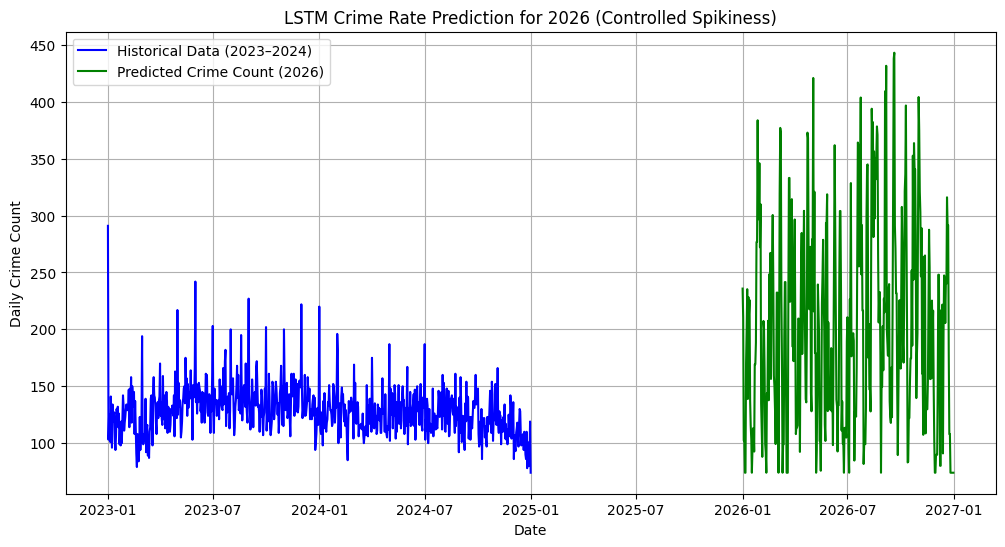


First 5 Predicted Crime Counts for 2026:
        Date  Predicted_Crime_Count
0 2026-01-01             235.845485
1 2026-01-02             210.203286
2 2026-01-03             102.306296
3 2026-01-04             102.306296
4 2026-01-05              74.000000


In [ ]:
# Title: LSTM Future Prediction for 2026 with Controlled Spikiness (2023–2024 Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)
train_size = len(X) - 90
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dropout(0.2))
model.add(LSTM(75, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Simulate 2026 weather with reduced noise
monthly_weather = daily_data.groupby(daily_data.index.month)[weather_vars].mean()
weather_2026 = []
for month in range(1, 13):
    month_data = monthly_weather.loc[month].values
    for _ in range(31 if month in [1, 3, 5, 7, 8, 10, 12] else 30 if month != 2 else 28):
        noise = np.random.normal(0, 0.05, len(weather_vars))  # Reduced weather noise
        weather_2026.append(month_data + noise)
weather_2026 = np.array(weather_2026)[:365]

# Scale 2026 weather
weather_2026_scaled = scaler.transform(
    np.hstack([np.zeros((365, 1)), weather_2026]))[:, 1:]

# Forecast for 2026
future_steps = 365
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31', freq='D')
last_sequence = scaled_data[-seq_length:].copy()
future_predictions = []

# Predict with controlled noise
historical_std = daily_data['crime_count'].std()
for i in range(future_steps):
    current_sequence = last_sequence.reshape((1, seq_length, len(weather_vars) + 1))
    next_pred = model.predict(current_sequence, verbose=0)[0, 0]

    # Add controlled noise
    noise = np.random.normal(0, historical_std * 0.05)  # Reduced noise
    next_pred += noise

    # Ensure non-negative in scaled space
    next_pred = max(next_pred, 0)

    future_predictions.append(next_pred)

    # Update sequence
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = next_pred
    last_sequence[-1, 1:] = weather_2026_scaled[i]

# Inverse scale predictions
future_pred_full = np.zeros((len(future_predictions), scaled_data.shape[1]))
future_pred_full[:, 0] = future_predictions
future_pred_inv = scaler.inverse_transform(future_pred_full)[:, 0]

# Ensure non-negative after inverse scaling
future_pred_inv = np.maximum(future_pred_inv, 0)

# Apply light smoothing to reduce excessive spikes
future_pred_inv = pd.Series(future_pred_inv).rolling(window=3, min_periods=1, center=True).mean().values

# Create DataFrame for 2026 predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_pred_inv
})

# Save predictions
future_df.to_csv('/content/drive/MyDrive/110171056/crime_predictions_2026_controlled.csv', index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2023–2024)', color='blue')
plt.plot(future_dates, future_pred_inv, label='Predicted Crime Count (2026)', color='green')
plt.title('LSTM Crime Rate Prediction for 2026 (Controlled Spikiness)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Display first few predictions
print("\nFirst 5 Predicted Crime Counts for 2026:")
print(future_df.head())


Test Mean Squared Error: 244.51, RMSE: 15.64


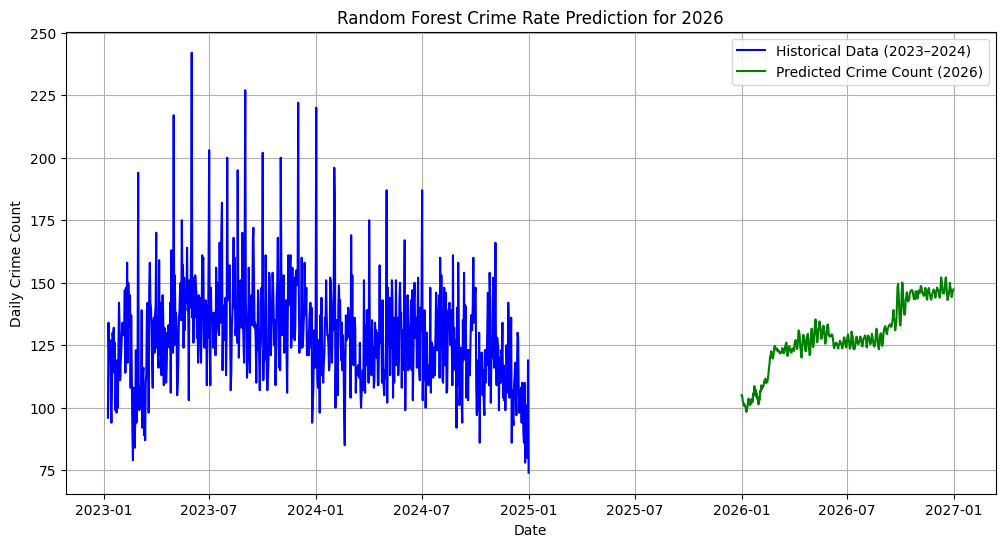


First 5 Predicted Crime Counts for 2026:
        Date  Predicted_Crime_Count
0 2026-01-01             105.032815
1 2026-01-02             104.798166
2 2026-01-03             102.689859
3 2026-01-04             102.034019
4 2026-01-05             100.784351


In [ ]:
# Title: Random Forest Future Prediction for 2026 (2023–2024 Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Feature engineering
daily_data['lag_1'] = daily_data['crime_count'].shift(1)
daily_data['lag_7'] = daily_data['crime_count'].shift(7)
daily_data['day_of_week'] = daily_data.index.dayofweek
daily_data['month'] = daily_data.index.month
daily_data['rolling_mean_7'] = daily_data['crime_count'].rolling(window=7).mean()
daily_data.dropna(inplace=True)

# Prepare features and target
features = ['lag_1', 'lag_7', 'day_of_week', 'month', 'rolling_mean_7'] + weather_vars
X = daily_data[features]
y = daily_data['crime_count']

# Split train/test (last 90 days)
train_size = len(X) - 90
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nTest Mean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Simulate 2026 weather (same as LSTM)
monthly_weather = daily_data.groupby(daily_data.index.month)[weather_vars].mean()
weather_2026 = []
for month in range(1, 13):
    month_data = monthly_weather.loc[month].values
    for _ in range(31 if month in [1, 3, 5, 7, 8, 10, 12] else 30 if month != 2 else 28):
        noise = np.random.normal(0, 0.05, len(weather_vars))
        weather_2026.append(month_data + noise)
weather_2026 = np.array(weather_2026)[:365]

# Prepare 2026 features
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31', freq='D')
future_data = pd.DataFrame(index=future_dates)
future_data['day_of_week'] = future_data.index.dayofweek
future_data['month'] = future_data.index.month
future_data[weather_vars] = weather_2026

# Initialize with last known values
last_data = daily_data.tail(7).copy()
future_predictions = []

# Predict iteratively
current_data = last_data.copy()
for i in range(365):
    # Prepare features for prediction
    current_data['lag_1'] = current_data['crime_count'].shift(1)
    current_data['lag_7'] = current_data['crime_count'].shift(7)
    current_data['rolling_mean_7'] = current_data['crime_count'].rolling(window=7).mean()
    current_features = current_data.tail(1)[features].copy()
    current_features[weather_vars] = weather_2026[i]
    current_features['day_of_week'] = future_data.iloc[i]['day_of_week']
    current_features['month'] = future_data.iloc[i]['month']

    # Predict
    pred = rf_model.predict(current_features)[0]

    # Add controlled noise for spikiness
    historical_std = daily_data['crime_count'].std()
    noise = np.random.normal(0, historical_std * 0.05)
    pred += noise

    # Ensure non-negative
    pred = max(pred, 0)

    future_predictions.append(pred)

    # Update current_data
    new_row = pd.DataFrame({
        'crime_count': [pred],
        'max_temperature_v': [weather_2026[i][0]],
        'precipitation_v': [weather_2026[i][1]],
    }, index=[future_dates[i]])
    current_data = pd.concat([current_data, new_row])

# Apply light smoothing
future_predictions = pd.Series(future_predictions).rolling(window=3, min_periods=1, center=True).mean().values

# Create DataFrame for 2026 predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_predictions
})

# Save predictions
future_df.to_csv('/content/drive/MyDrive/110171056/crime_predictions_2026_rf.csv', index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2023–2024)', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Crime Count (2026)', color='green')
plt.title('Random Forest Crime Rate Prediction for 2026')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Display first few predictions
print("\nFirst 5 Predicted Crime Counts for 2026:")
print(future_df.head())


Test Mean Squared Error: 244.51, RMSE: 15.64


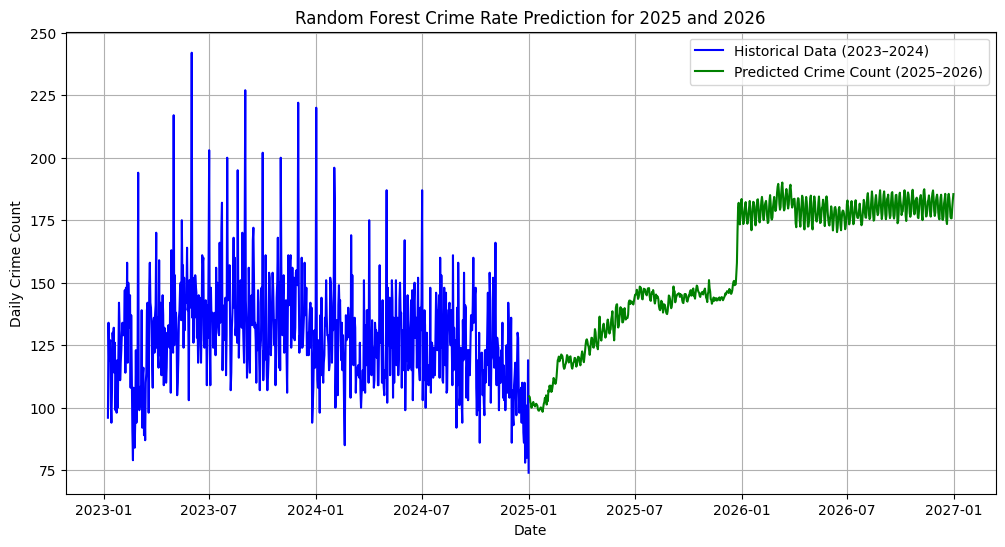


First 5 Predicted Crime Counts for 2025:
        Date  Predicted_Crime_Count
0 2025-01-01             104.544250
1 2025-01-02             104.240283
2 2025-01-03             102.174192
3 2025-01-04             101.627433
4 2025-01-05             100.001074

Last 5 Predicted Crime Counts for 2026:
          Date  Predicted_Crime_Count
725 2026-12-27             175.760421
726 2026-12-28             175.775604
727 2026-12-29             179.853619
728 2026-12-30             182.956726
729 2026-12-31             185.445667


In [ ]:
# Title: Random Forest Future Prediction for 2025 and 2026 (2023–2024 Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Feature engineering
daily_data['lag_1'] = daily_data['crime_count'].shift(1)
daily_data['lag_7'] = daily_data['crime_count'].shift(7)
daily_data['day_of_week'] = daily_data.index.dayofweek
daily_data['month'] = daily_data.index.month
daily_data['rolling_mean_7'] = daily_data['crime_count'].rolling(window=7).mean()
daily_data.dropna(inplace=True)

# Prepare features and target
features = ['lag_1', 'lag_7', 'day_of_week', 'month', 'rolling_mean_7'] + weather_vars
X = daily_data[features]
y = daily_data['crime_count']

# Split train/test (last 90 days)
train_size = len(X) - 90
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nTest Mean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}")

# Simulate weather for 2025 and 2026 (730 days)
monthly_weather = daily_data.groupby(daily_data.index.month)[weather_vars].mean()
weather_future = []
for year in [2025, 2026]:
    for month in range(1, 13):
        month_data = monthly_weather.loc[month].values
        days = 31 if month in [1, 3, 5, 7, 8, 10, 12] else 30 if month != 2 else 29 if year % 4 == 0 else 28
        for _ in range(days):
            noise = np.random.normal(0, 0.05, len(weather_vars))
            weather_future.append(month_data + noise)
weather_future = np.array(weather_future)[:730]  # 730 days (2025 + 2026)

# Prepare future features
future_dates = pd.date_range(start='2025-01-01', end='2026-12-31', freq='D')
future_data = pd.DataFrame(index=future_dates)
future_data['day_of_week'] = future_data.index.dayofweek
future_data['month'] = future_data.index.month
future_data[weather_vars] = weather_future

# Initialize with last known values
last_data = daily_data.tail(7).copy()
future_predictions = []

# Predict iteratively
current_data = last_data.copy()
for i in range(730):
    # Prepare features for prediction
    current_data['lag_1'] = current_data['crime_count'].shift(1)
    current_data['lag_7'] = current_data['crime_count'].shift(7)
    current_data['rolling_mean_7'] = current_data['crime_count'].rolling(window=7).mean()
    current_features = current_data.tail(1)[features].copy()
    current_features[weather_vars] = weather_future[i]
    current_features['day_of_week'] = future_data.iloc[i]['day_of_week']
    current_features['month'] = future_data.iloc[i]['month']

    # Predict
    pred = rf_model.predict(current_features)[0]

    # Add controlled noise for spikiness
    historical_std = daily_data['crime_count'].std()
    noise = np.random.normal(0, historical_std * 0.05)
    pred += noise

    # Ensure non-negative
    pred = max(pred, 0)

    future_predictions.append(pred)

    # Update current_data
    new_row = pd.DataFrame({
        'crime_count': [pred],
        'max_temperature_v': [weather_future[i][0]],
        'precipitation_v': [weather_future[i][1]],
    }, index=[future_dates[i]])
    current_data = pd.concat([current_data, new_row])

# Apply light smoothing
future_predictions = pd.Series(future_predictions).rolling(window=3, min_periods=1, center=True).mean().values

# Create DataFrame for predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_predictions
})

# Save predictions
future_df.to_csv('/content/drive/MyDrive/110171056/crime_predictions_2025_2026_rf.csv', index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['crime_count'], label='Historical Data (2023–2024)', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Crime Count (2025–2026)', color='green')
plt.title('Random Forest Crime Rate Prediction for 2025 and 2026')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Display first few predictions
print("\nFirst 5 Predicted Crime Counts for 2025:")
print(future_df.head())

# Display last few predictions
print("\nLast 5 Predicted Crime Counts for 2026:")
print(future_df.tail())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvoyjwhkp/gfhfesw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvoyjwhkp/fhkmfjm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46161', 'data', 'file=/tmp/tmpvoyjwhkp/gfhfesw_.json', 'init=/tmp/tmpvoyjwhkp/fhkmfjm7.json', 'output', 'file=/tmp/tmpvoyjwhkp/prophet_model_zarb0cq/prophet_model-20250324170752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:07:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:07:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-18-aba1702a858d>:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_dates[weather_vars] = future_dates[weather_vars].fillna(metho

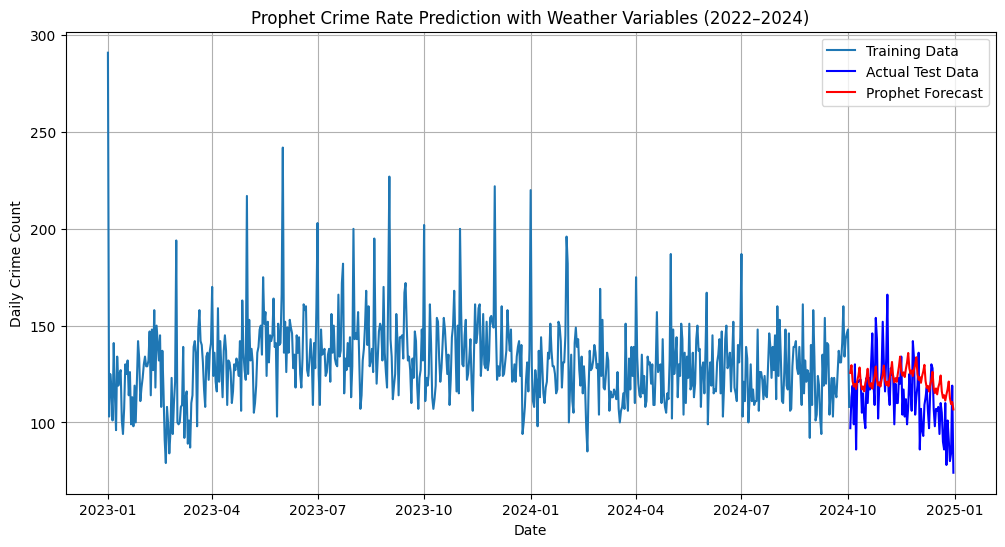

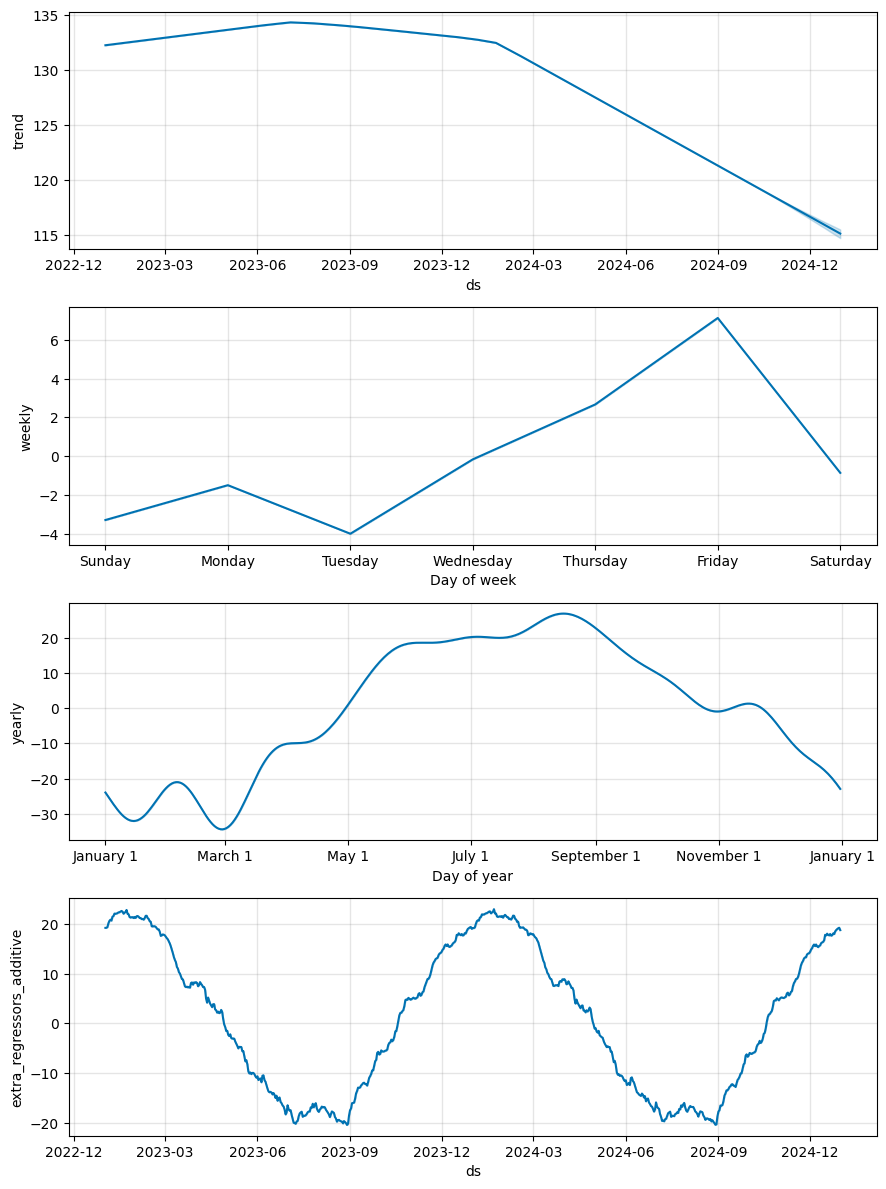

In [ ]:
# Title: Fit Prophet Model with Weather Variables (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
daily_crime.rename(columns={'OCC_DATE': 'ds', 'crime_count': 'y'}, inplace=True)

# Add weather variables
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     left_on='ds', right_on='OCC_DATE')
daily_data.drop(columns=['OCC_DATE'], inplace=True)

# Split train/test (last 90 days)
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]

# Fit Prophet model with weather regressors
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)
prophet_model.add_regressor('max_temperature_v')
prophet_model.add_regressor('precipitation_v')
prophet_model.fit(train_data)

# Prepare future dataframe with regressors for forecasting
future_dates = prophet_model.make_future_dataframe(periods=90, freq='D')
future_dates = pd.merge(future_dates, daily_data[['ds'] + weather_vars], on='ds', how='left')
future_dates[weather_vars] = future_dates[weather_vars].fillna(method='ffill')  # Forward fill for test period
forecast = prophet_model.predict(future_dates)

# Save forecast for evaluation in the next shell
forecast.tail(90).to_csv('/content/drive/MyDrive/110171056/prophet_forecast_2022_2024.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/110171056/prophet_test_data_2022_2024.csv', index=False)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Training Data')
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='blue')
plt.plot(test_data['ds'], forecast.tail(90)['yhat'], label='Prophet Forecast', color='red')
plt.title('Prophet Crime Rate Prediction with Weather Variables (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

# Plot Prophet components
fig = prophet_model.plot_components(forecast)
plt.show()


SARIMA Model Accuracy Metrics (2022–2024):
MSE: 348.42
RMSE: 18.67
MAE: 14.96
MAPE: 14.47%
SMAPE: 13.14%
R-squared: -0.23
Directional Accuracy: 56.18%


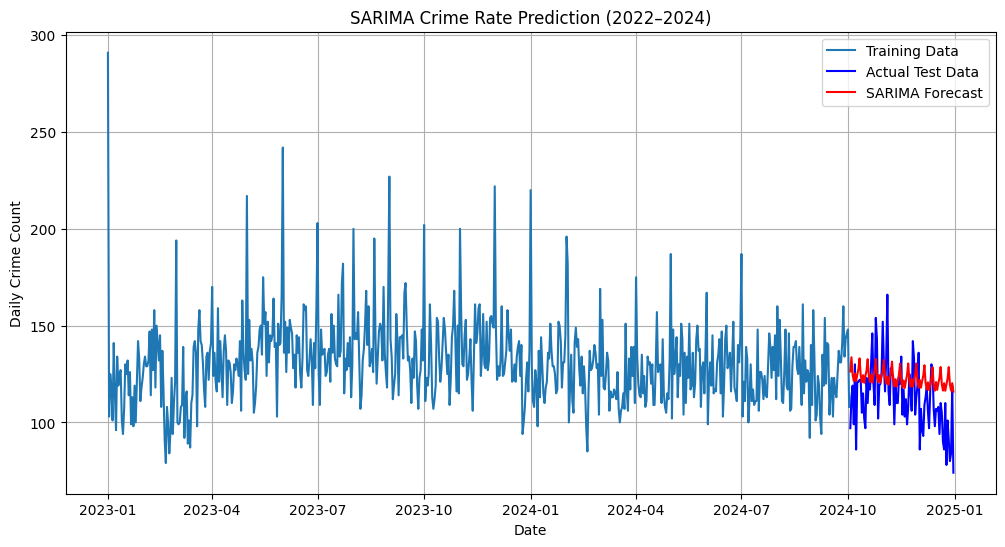

In [ ]:
# Title: Evaluate SARIMA Model Accuracy (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily crime counts
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Split train/test
train_data = daily_data.iloc[:-90]
test_data = daily_data.iloc[-90:]
endog_train = train_data['crime_count']
exog_train = train_data[weather_vars]
endog_test = test_data['crime_count']
exog_test = test_data[weather_vars]

# Fit SARIMA
sarima_model = SARIMAX(endog_train,
                      exog=exog_train,
                      order=(1, 1, 1),
                      seasonal_order=(0, 1, 1, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False, maxiter=200)

# Forecast
forecast = sarima_fit.forecast(steps=90, exog=exog_test)

# Convert to numpy arrays for calculations
y_actual = endog_test.values
y_pred = forecast.values

# Calculate metrics
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
smape = np.mean(np.abs(y_actual - y_pred) / ((np.abs(y_actual) + np.abs(y_pred)) / 2)) * 100
r2 = r2_score(y_actual, y_pred)

# Directional accuracy
actual_diff = np.sign(np.diff(y_actual))
pred_diff = np.sign(np.diff(y_pred))
directional_accuracy = np.mean(actual_diff == pred_diff) * 100

# Print results
print("\nSARIMA Model Accuracy Metrics (2022–2024):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"R-squared: {r2:.2f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, endog_train, label='Training Data')
plt.plot(test_data.index, endog_test, label='Actual Test Data', color='blue')
plt.plot(test_data.index, forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Crime Rate Prediction (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0568 - val_loss: 0.0127
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0131 - val_loss: 0.0078
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0111 - val_loss: 0.0087
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0100 - val_loss: 0.0081
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0097 - val_loss: 0.0073
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0102 - val_loss: 0.0069
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0094 - val_loss: 0.0078
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step

LSTM Model Accuracy Metrics (2022–2024):
MSE: 392.91
RMSE: 19.82
MAE: 16.45
MAPE: 15.92%
SMAPE: 14.32%
R-squared: -0.38
Directional Accuracy: 40.45%


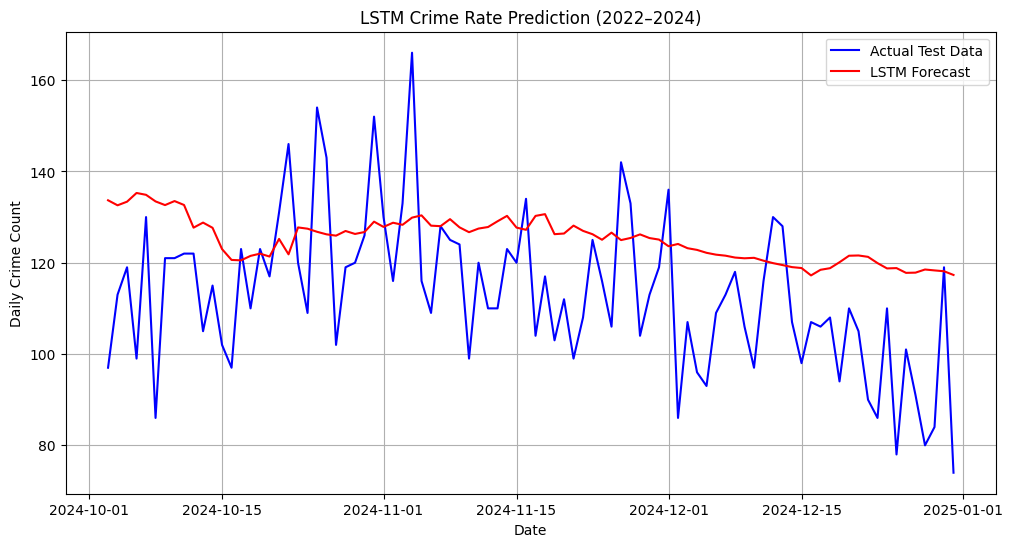

In [ ]:
# Title: Evaluate LSTM Model Accuracy (2022–2024)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
merged_df = pd.read_csv('/content/drive/MyDrive/110171056/merged_last_2.csv')
merged_df['OCC_DATE'] = pd.to_datetime(merged_df['OCC_DATE'], format='%Y-%m-%d')

# Aggregate daily data
daily_crime = merged_df.groupby('OCC_DATE')['EVENT_UNIQUE_ID'].count().reset_index(name='crime_count')
weather_vars = ['max_temperature_v', 'precipitation_v']
daily_data = pd.merge(daily_crime,
                     merged_df[['OCC_DATE'] + weather_vars].drop_duplicates(),
                     on='OCC_DATE')
daily_data.set_index('OCC_DATE', inplace=True)
daily_data.index.freq = 'D'

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['crime_count'] + weather_vars])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 14
X, y = create_sequences(scaled_data, seq_length)
train_size = len(X) - 90
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, len(weather_vars) + 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Forecast
y_pred = model.predict(X_test)

# Inverse scale
y_test_full = np.zeros((len(y_test), scaled_data.shape[1]))
y_test_full[:, 0] = y_test
y_pred_full = np.zeros((len(y_pred), scaled_data.shape[1]))
y_pred_full[:, 0] = y_pred.flatten()
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
smape = np.mean(np.abs(y_test_inv - y_pred_inv) / ((np.abs(y_test_inv) + np.abs(y_pred_inv)) / 2)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# Directional accuracy
actual_diff = np.sign(np.diff(y_test_inv))
pred_diff = np.sign(np.diff(y_pred_inv))
directional_accuracy = np.mean(actual_diff == pred_diff) * 100

# Print results
print("\nLSTM Model Accuracy Metrics (2022–2024):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"R-squared: {r2:.2f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-90:], y_test_inv, label='Actual Test Data', color='blue')
plt.plot(daily_data.index[-90:], y_pred_inv, label='LSTM Forecast', color='red')
plt.title('LSTM Crime Rate Prediction (2022–2024)')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Title: Evaluate Prophet Model Accuracy with Weather Variables (2022–2024)
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load test data and forecast
test_data = pd.read_csv('/content/drive/MyDrive/110171056/prophet_test_data_2022_2024.csv')
forecast = pd.read_csv('/content/drive/MyDrive/110171056/prophet_forecast_2022_2024.csv')

# Extract actual and predicted values
y_actual = test_data['y'].values
y_pred = forecast['yhat'].values

# Calculate metrics
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
smape = np.mean(np.abs(y_actual - y_pred) / ((np.abs(y_actual) + np.abs(y_pred)) / 2)) * 100
r2 = r2_score(y_actual, y_pred)

# Directional accuracy
actual_diff = np.sign(np.diff(y_actual))
pred_diff = np.sign(np.diff(y_pred))
directional_accuracy = np.mean(actual_diff == pred_diff) * 100

# Print results
print("\nProphet Model Accuracy Metrics with Weather Variables (2022–2024):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"R-squared: {r2:.2f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")


Prophet Model Accuracy Metrics with Weather Variables (2022–2024):
MSE: 320.29
RMSE: 17.90
MAE: 14.38
MAPE: 13.75%
SMAPE: 12.64%
R-squared: -0.13
Directional Accuracy: 56.18%
